# Data Science with Python
## Chapter 5
## Decision Trees and Random Forests

Learning Objectives
By the end of this chapter, you will be able to:

• Train a decision tree model in scikit-learn

• Use Graphviz to visualize a trained decision tree model

• Formulate the cost functions used to split nodes in a decision tree

• Perform a hyperparameter grid search using cross-validation with scikit-learn functions

• Train a random forest model in scikit-learn

• Evaluate the most important features in a random forest model

This chapter introduces decision trees and random forests in scikit-learn in addition to
describing the method to perform hyperparameter grid search.

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# ^^^ pyforest auto-imports - don't write above this line
# importing modules
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
# import data
df = pd.read_csv('C:/Users/Box/Documents/Ebooks/Data Science/\
Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()
len(features_response)

30

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school',
                   'none', 'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, 
                                                    df['default payment next month'].values, 
                                                    test_size=0.2, random_state=24)

In [8]:
dtree = tree.DecisionTreeClassifier(max_depth=2)

In [9]:
dtree.fit(X_train, y_train).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, 
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

Here, we've specified a number of options to the .export_graphviz method. First,
we need to say which trained model we'd like to graph, which we've got in the
dt object. 
Next, we say we don't want an output file: out_file=None. 
Instead, we provide the dot_data variable to hold the output of this method. 
The rest of the options are used as follows:

filled=True: Each node will be filled with a color.

rounded=True: The nodes will appear with rounded edges as opposed to rectangles.

feature_names=features_response[:-1]: The names of the features from our list
will be used as opposed to generic names such as X[0].

proportion=True: The proportion of samples in each node will be displayed (we'll
discuss this more later).

class_names=['Not defaulted', 'Defaulted']: The name of the predicted class will
be displayed for each node

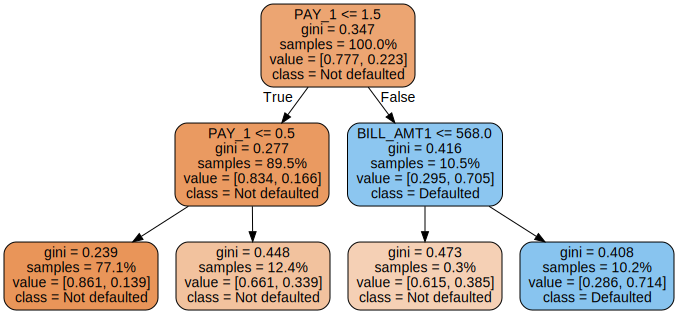

In [11]:
graph = graphviz.Source(dot_data)
graph

In [12]:
features_response[:-1].index('PAY_1')

4

In [13]:
X_train.shape

(21331, 17)

In [14]:
sum(X_train[:, 4] <= 1.5)/X_train.shape[0]

0.8946134733486475

In [15]:
X_train[:, 4] <= 1.5

array([ True, False,  True, ..., False,  True,  True])

In [16]:
features_response[:-1].index('BILL_AMT1')

5

In [17]:

[item for item in range(len(X_train[:, 4])) if X_train[:, 4][item]<=1.5 and X_train[:, 5][item] <= 568.0 ]

[6,
 14,
 19,
 20,
 21,
 28,
 33,
 36,
 55,
 59,
 67,
 69,
 79,
 80,
 83,
 84,
 107,
 112,
 115,
 123,
 124,
 126,
 127,
 128,
 137,
 138,
 156,
 158,
 159,
 176,
 179,
 196,
 200,
 206,
 226,
 229,
 230,
 243,
 252,
 253,
 256,
 266,
 273,
 313,
 329,
 338,
 343,
 352,
 354,
 361,
 364,
 387,
 389,
 395,
 421,
 427,
 428,
 438,
 439,
 452,
 453,
 458,
 462,
 472,
 482,
 490,
 492,
 503,
 504,
 514,
 519,
 522,
 523,
 537,
 540,
 541,
 543,
 544,
 558,
 567,
 569,
 582,
 584,
 589,
 590,
 597,
 598,
 605,
 606,
 622,
 624,
 633,
 641,
 642,
 644,
 645,
 657,
 658,
 667,
 680,
 682,
 684,
 702,
 704,
 708,
 716,
 718,
 723,
 736,
 741,
 744,
 749,
 777,
 785,
 787,
 799,
 804,
 814,
 817,
 820,
 827,
 840,
 841,
 842,
 849,
 856,
 859,
 866,
 871,
 878,
 888,
 892,
 895,
 896,
 898,
 904,
 920,
 928,
 929,
 946,
 952,
 954,
 957,
 960,
 971,
 986,
 987,
 994,
 1005,
 1027,
 1030,
 1041,
 1056,
 1085,
 1095,
 1109,
 1113,
 1120,
 1130,
 1141,
 1162,
 1166,
 1171,
 1184,
 1199,
 1204,
 12

In [18]:
bool_array = []
for item in range(len(X_train)):
    bool_array.append(X_train[:, 4][item]>1.5 and X_train[:, 5][item] > 568.0)
bool_array

[False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

In [19]:
sum(bool_array)/X_train.shape[0]

0.10233931836294595

In [20]:
np.mean(y_train)

0.223102526838873

In [21]:
pm0 = np.linspace(0.01,0.99,99)
pm1 = 1 - pm0

In [22]:
misclassification_rate = np.minimum(pm0, pm1)

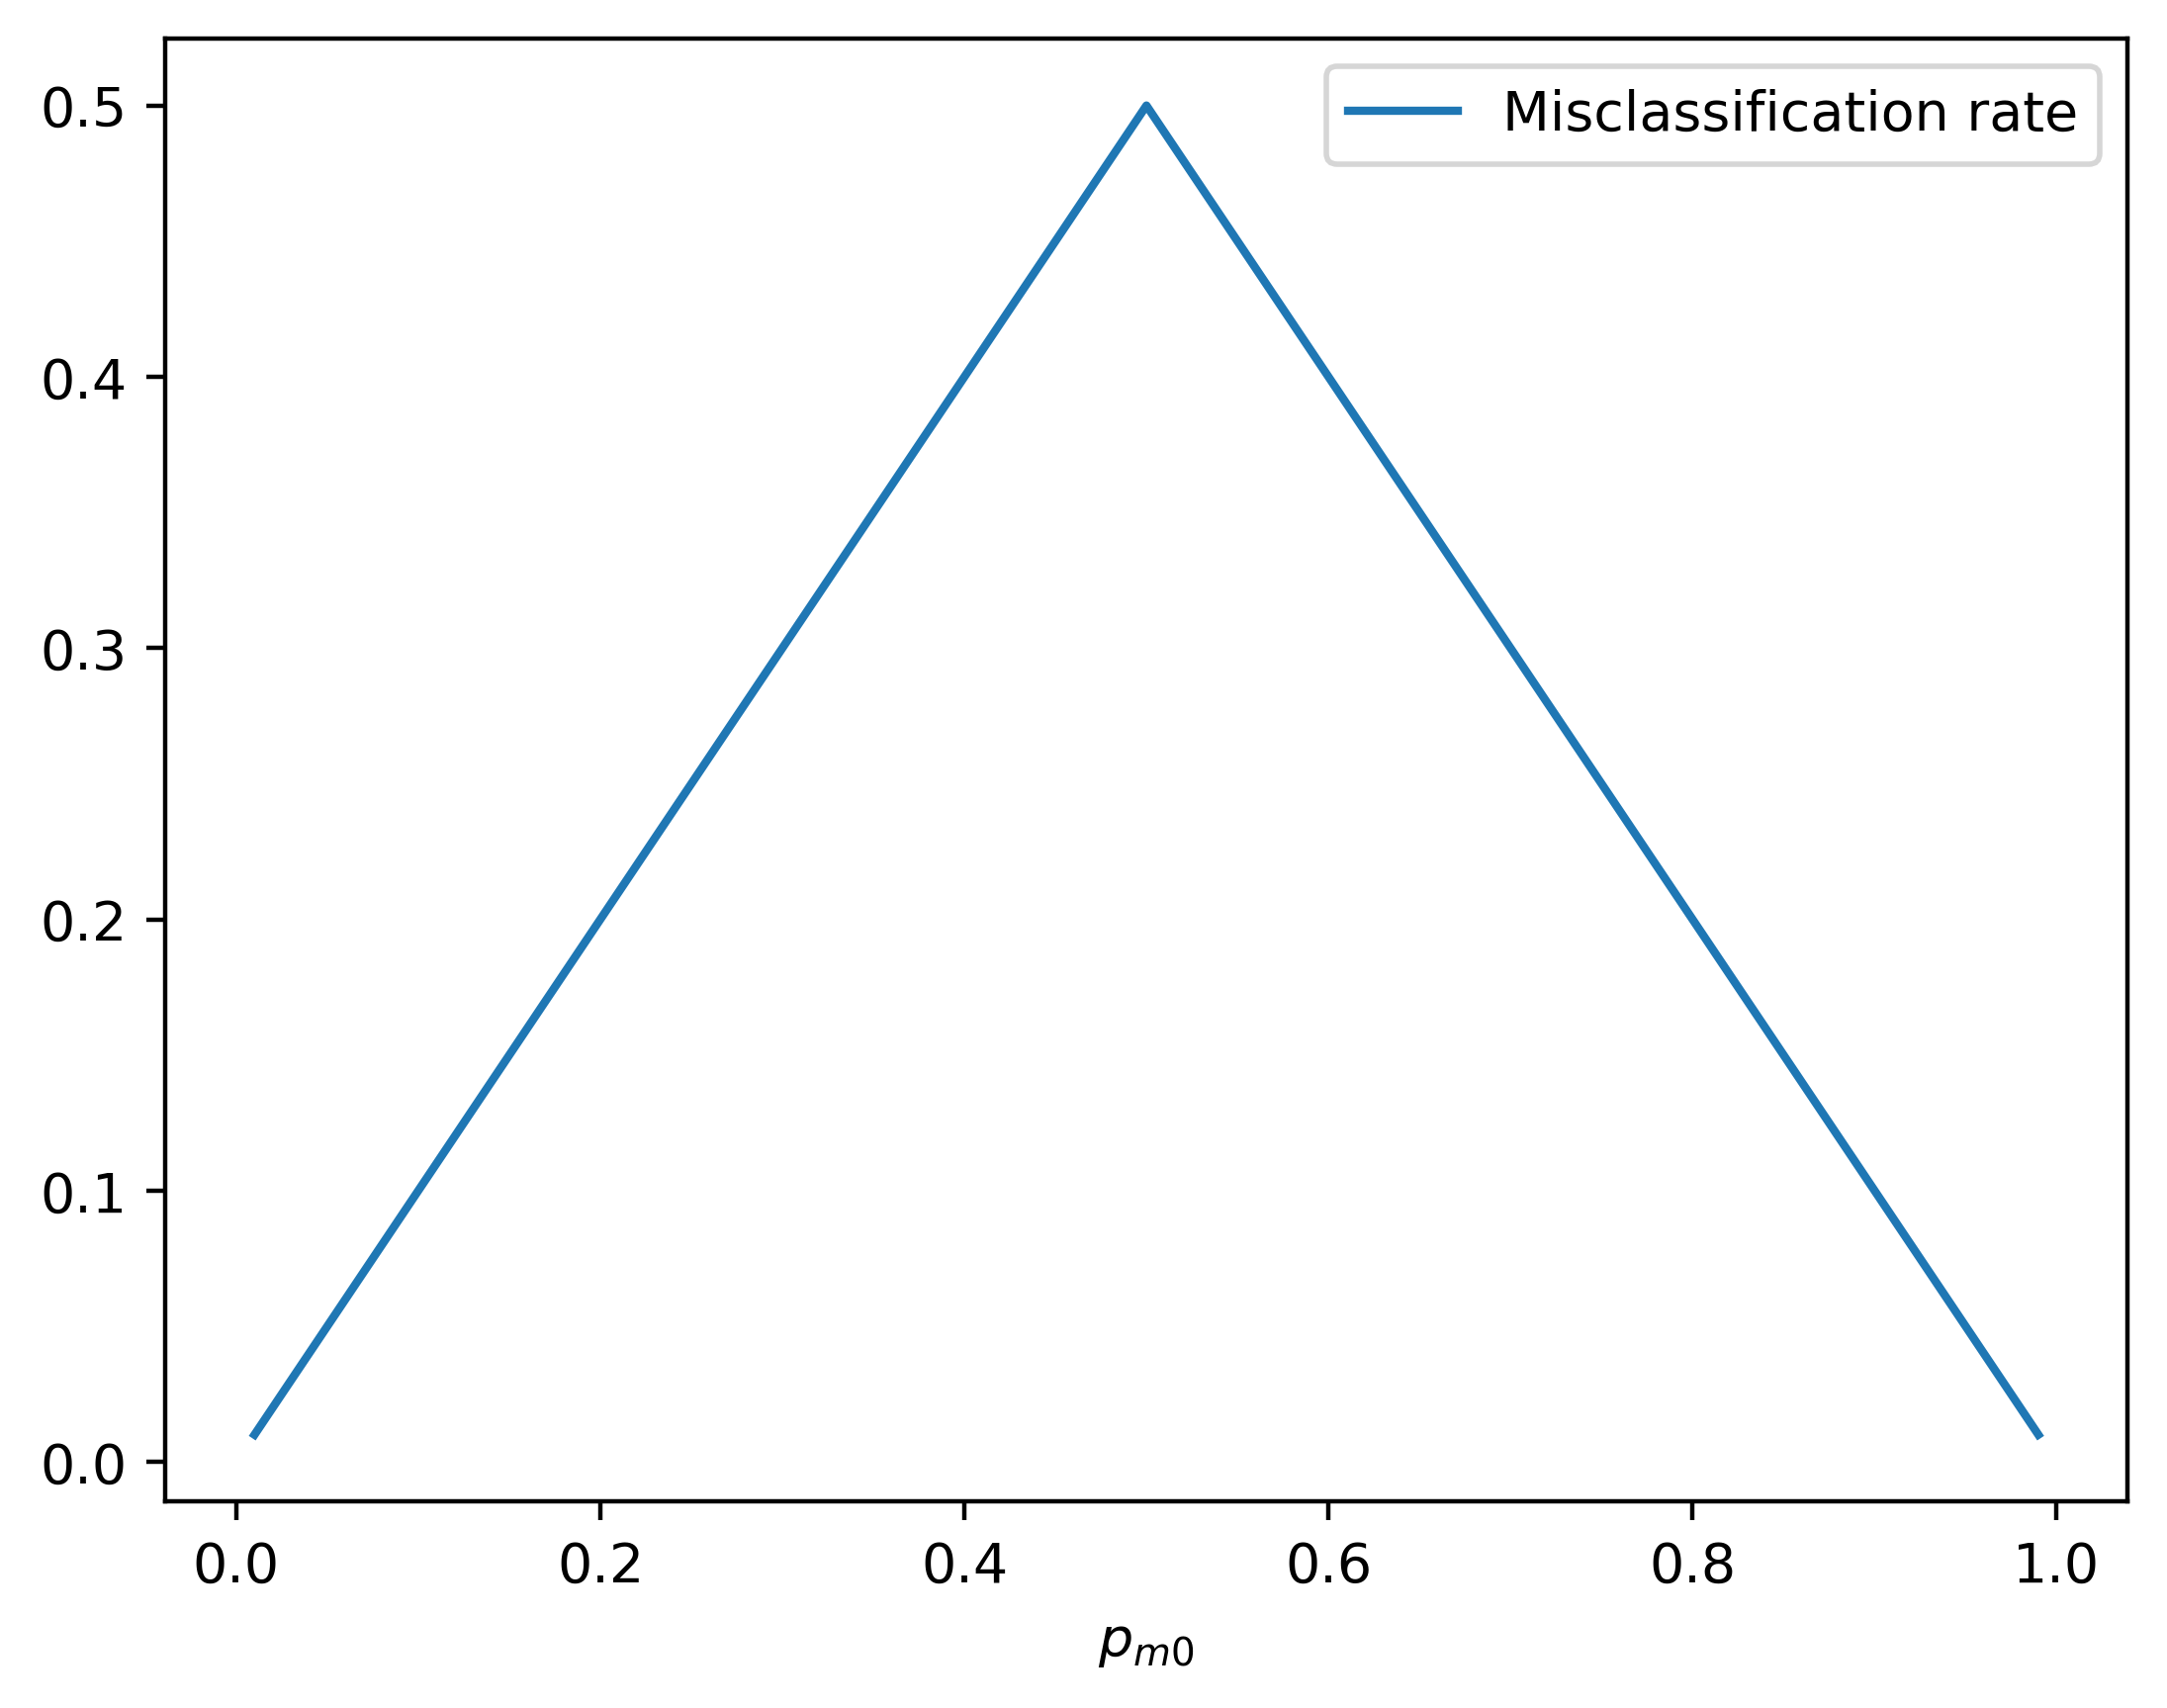

In [23]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [24]:
gini = (pm0*(1-pm0)) + (pm1*(1-pm1)) # gini mode
gini

array([0.0198, 0.0392, 0.0582, 0.0768, 0.095 , 0.1128, 0.1302, 0.1472,
       0.1638, 0.18  , 0.1958, 0.2112, 0.2262, 0.2408, 0.255 , 0.2688,
       0.2822, 0.2952, 0.3078, 0.32  , 0.3318, 0.3432, 0.3542, 0.3648,
       0.375 , 0.3848, 0.3942, 0.4032, 0.4118, 0.42  , 0.4278, 0.4352,
       0.4422, 0.4488, 0.455 , 0.4608, 0.4662, 0.4712, 0.4758, 0.48  ,
       0.4838, 0.4872, 0.4902, 0.4928, 0.495 , 0.4968, 0.4982, 0.4992,
       0.4998, 0.5   , 0.4998, 0.4992, 0.4982, 0.4968, 0.495 , 0.4928,
       0.4902, 0.4872, 0.4838, 0.48  , 0.4758, 0.4712, 0.4662, 0.4608,
       0.455 , 0.4488, 0.4422, 0.4352, 0.4278, 0.42  , 0.4118, 0.4032,
       0.3942, 0.3848, 0.375 , 0.3648, 0.3542, 0.3432, 0.3318, 0.32  ,
       0.3078, 0.2952, 0.2822, 0.2688, 0.255 , 0.2408, 0.2262, 0.2112,
       0.1958, 0.18  , 0.1638, 0.1472, 0.1302, 0.1128, 0.095 , 0.0768,
       0.0582, 0.0392, 0.0198])

In [25]:
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1))) # cross entropy mode
cross_ent

array([0.05600153, 0.09803911, 0.13474217, 0.16794415, 0.19851524,
       0.22696752, 0.25363895, 0.27876937, 0.30253782, 0.32508297,
       0.34651534, 0.36692499, 0.38638671, 0.40496349, 0.42270909,
       0.43966988, 0.45588621, 0.47139349, 0.48622296, 0.50040242,
       0.51395667, 0.52690796, 0.53927634, 0.55107993, 0.56233514,
       0.57305692, 0.58325884, 0.59295332, 0.60215168, 0.6108643 ,
       0.61910066, 0.62686946, 0.63417864, 0.64103548, 0.64744664,
       0.65341819, 0.65895568, 0.66406413, 0.66874809, 0.67301167,
       0.67685855, 0.680292  , 0.68331491, 0.6859298 , 0.68813881,
       0.68994376, 0.6913461 , 0.69234697, 0.69294717, 0.69314718,
       0.69294717, 0.69234697, 0.6913461 , 0.68994376, 0.68813881,
       0.6859298 , 0.68331491, 0.680292  , 0.67685855, 0.67301167,
       0.66874809, 0.66406413, 0.65895568, 0.65341819, 0.64744664,
       0.64103548, 0.63417864, 0.62686946, 0.61910066, 0.6108643 ,
       0.60215168, 0.59295332, 0.58325884, 0.57305692, 0.56233

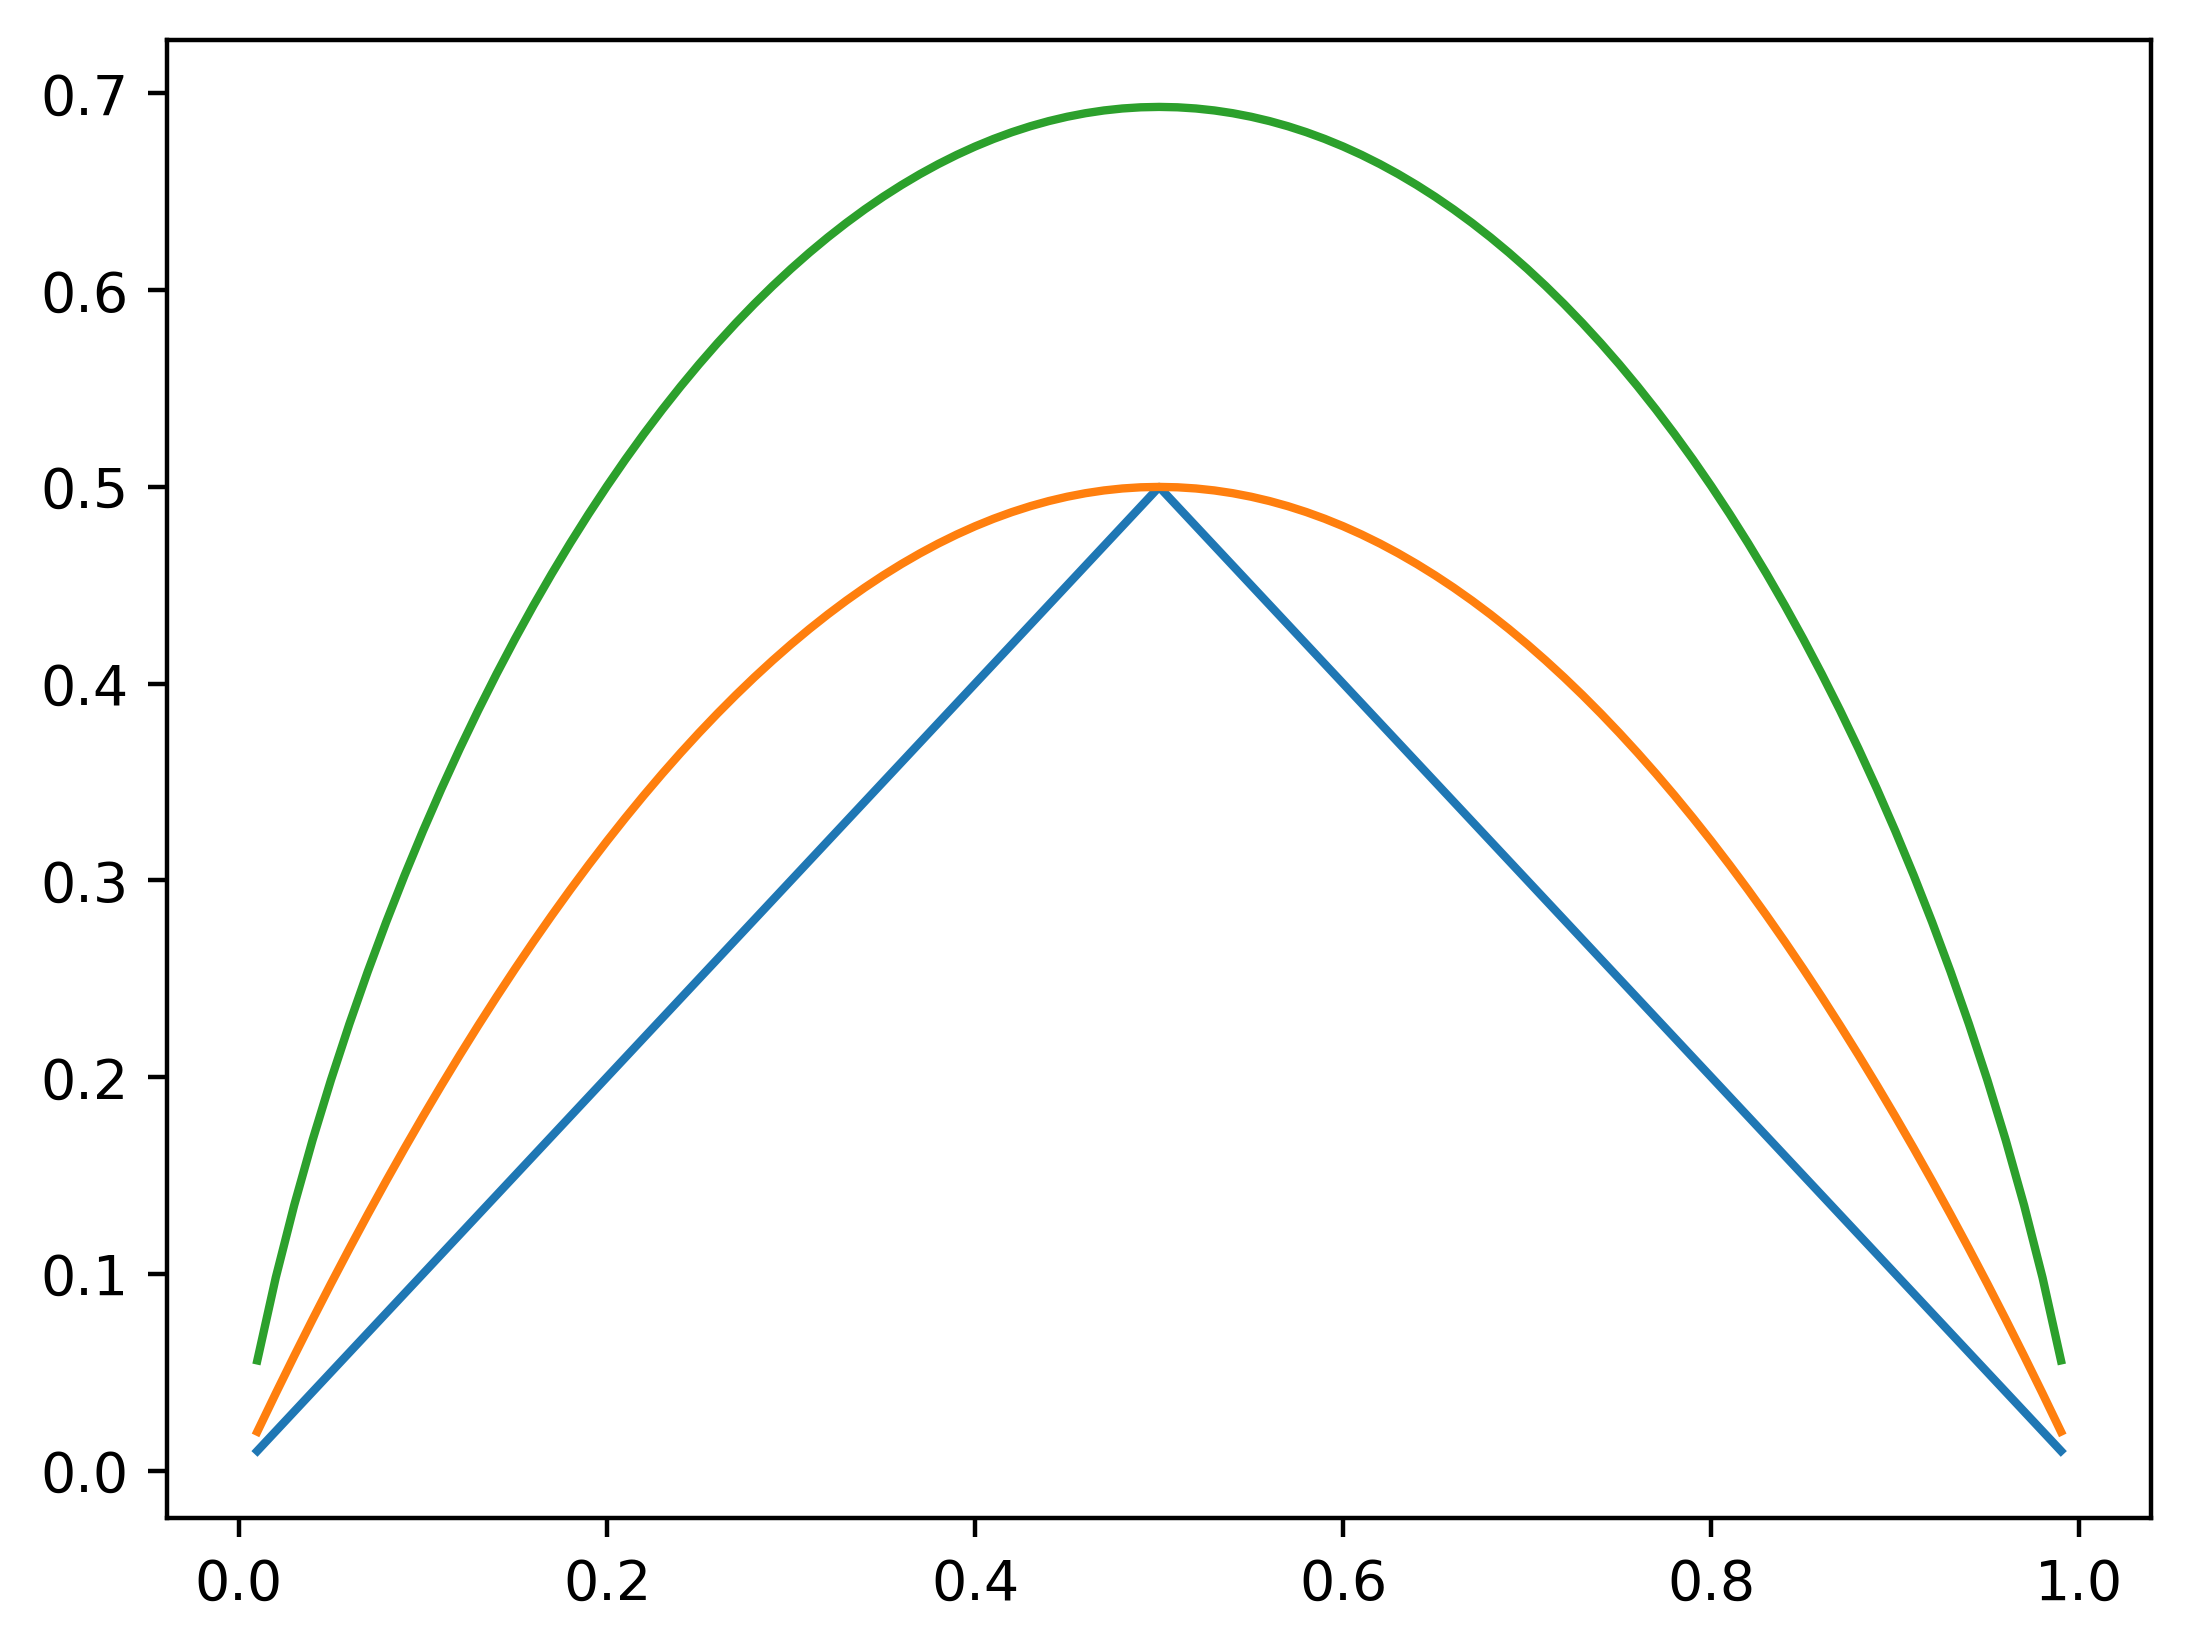

In [26]:
plt.plot(pm0, misclassification_rate, label = 'Misclassification rate')
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')


[]

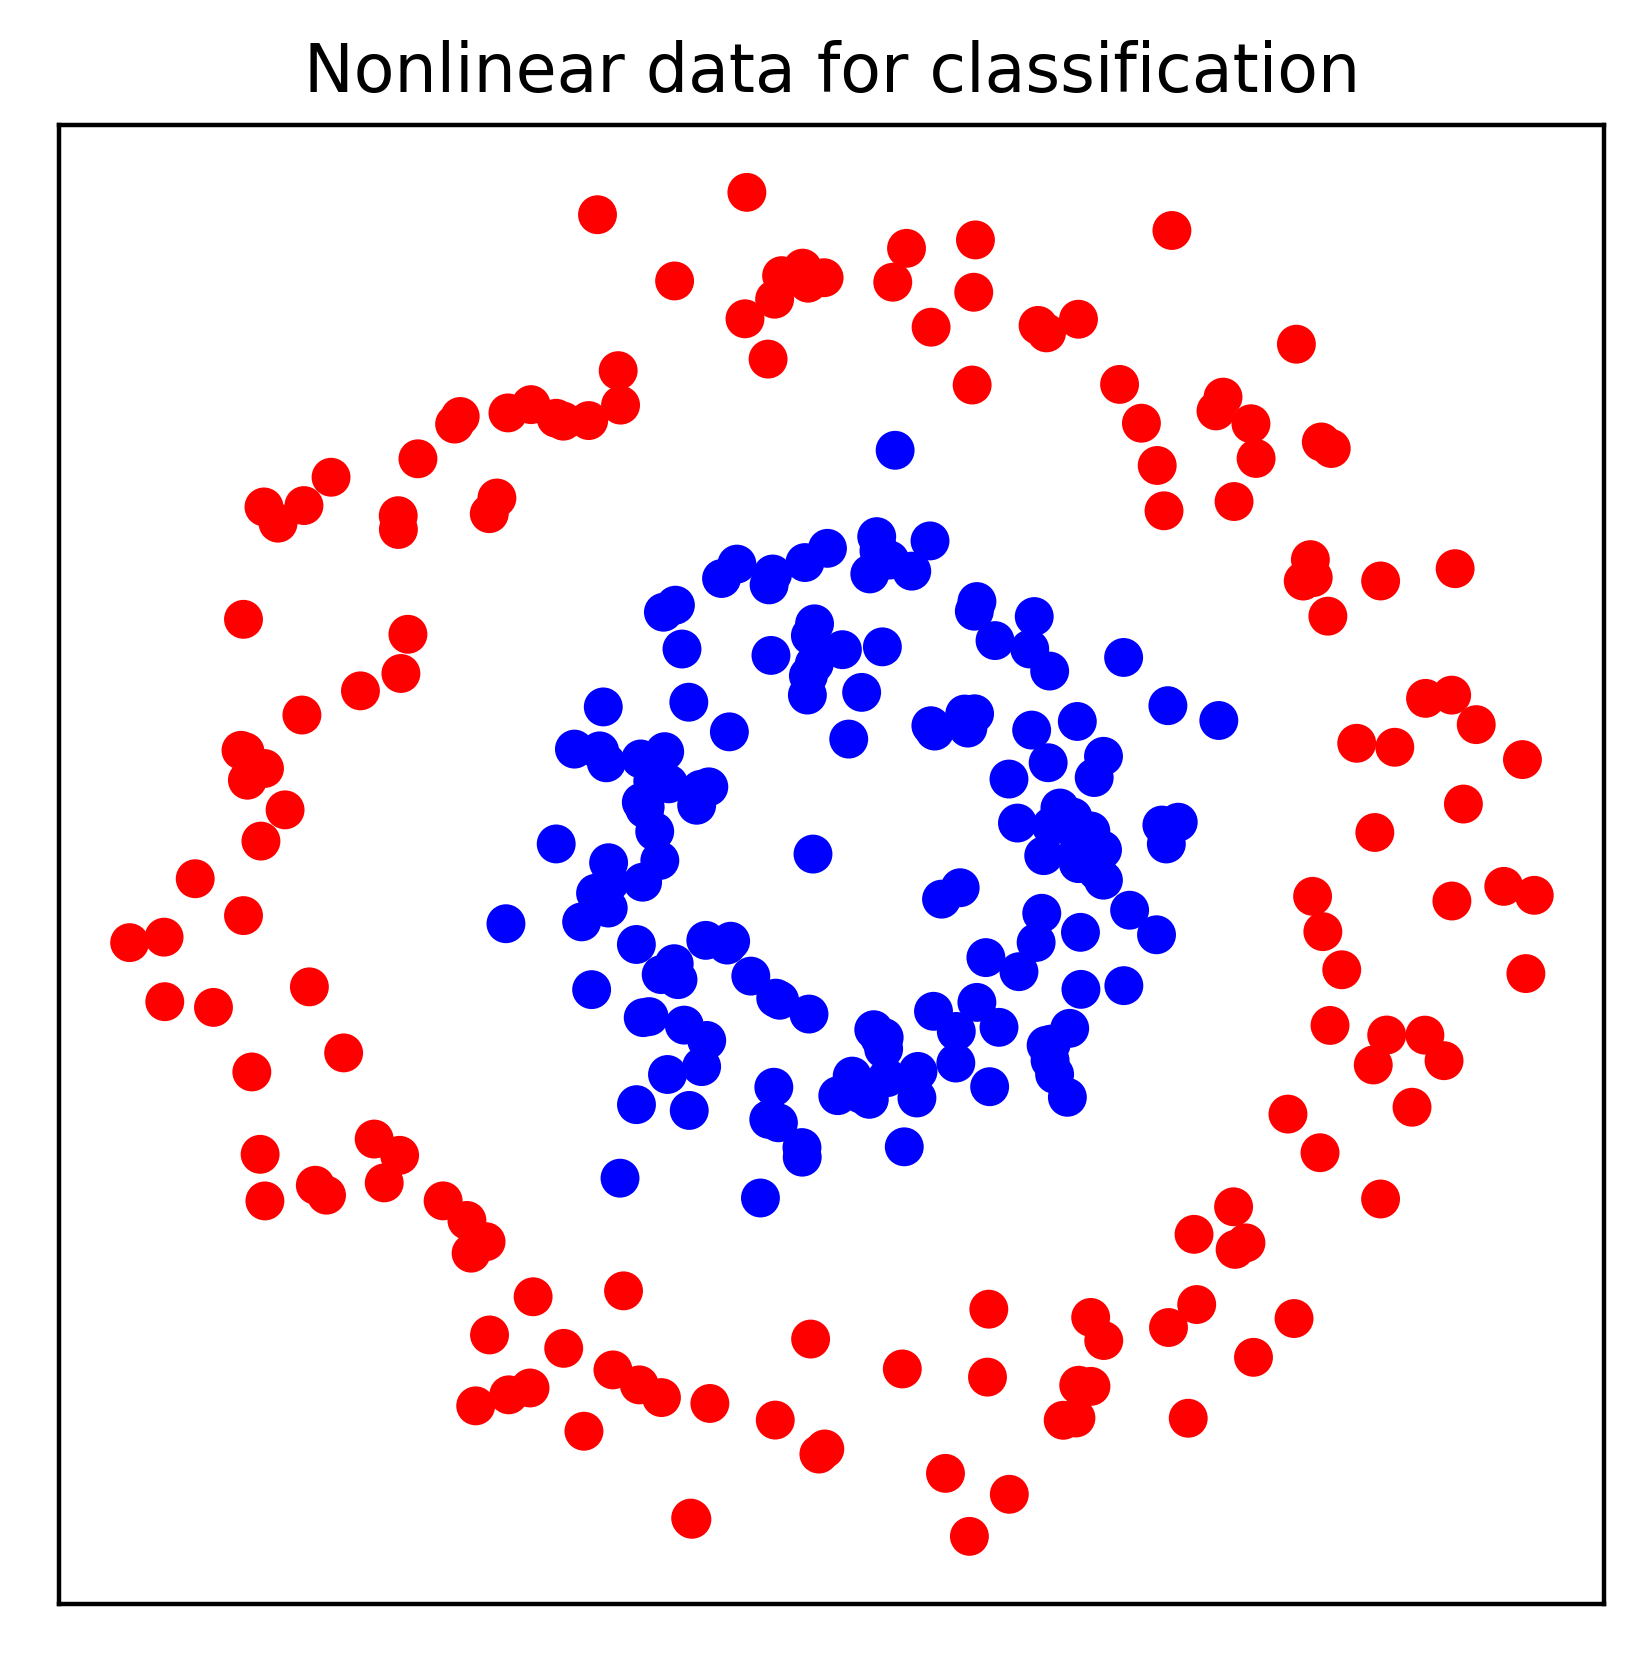

In [27]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

X_circ, y_circ = make_circles(n_samples = 300, shuffle=True,
                             noise=0.1, random_state=1, factor=0.4)
# colors
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.axes()
ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
ax.set_aspect('equal')
ax.set_title('Nonlinear data for classification')
ax.set_xticks([])
ax.set_yticks([])

In [28]:
x_min, x_max = X_circ[:, 0].min() - .5, X_circ[:, 0].max() + .5
y_min, y_max = X_circ[:, 1].min() - .5, X_circ[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifiers = [tree.DecisionTreeClassifier(max_depth=4, random_state=4),
              LogisticRegression()]
titles = ['Decision tree', 'Logistic regression']

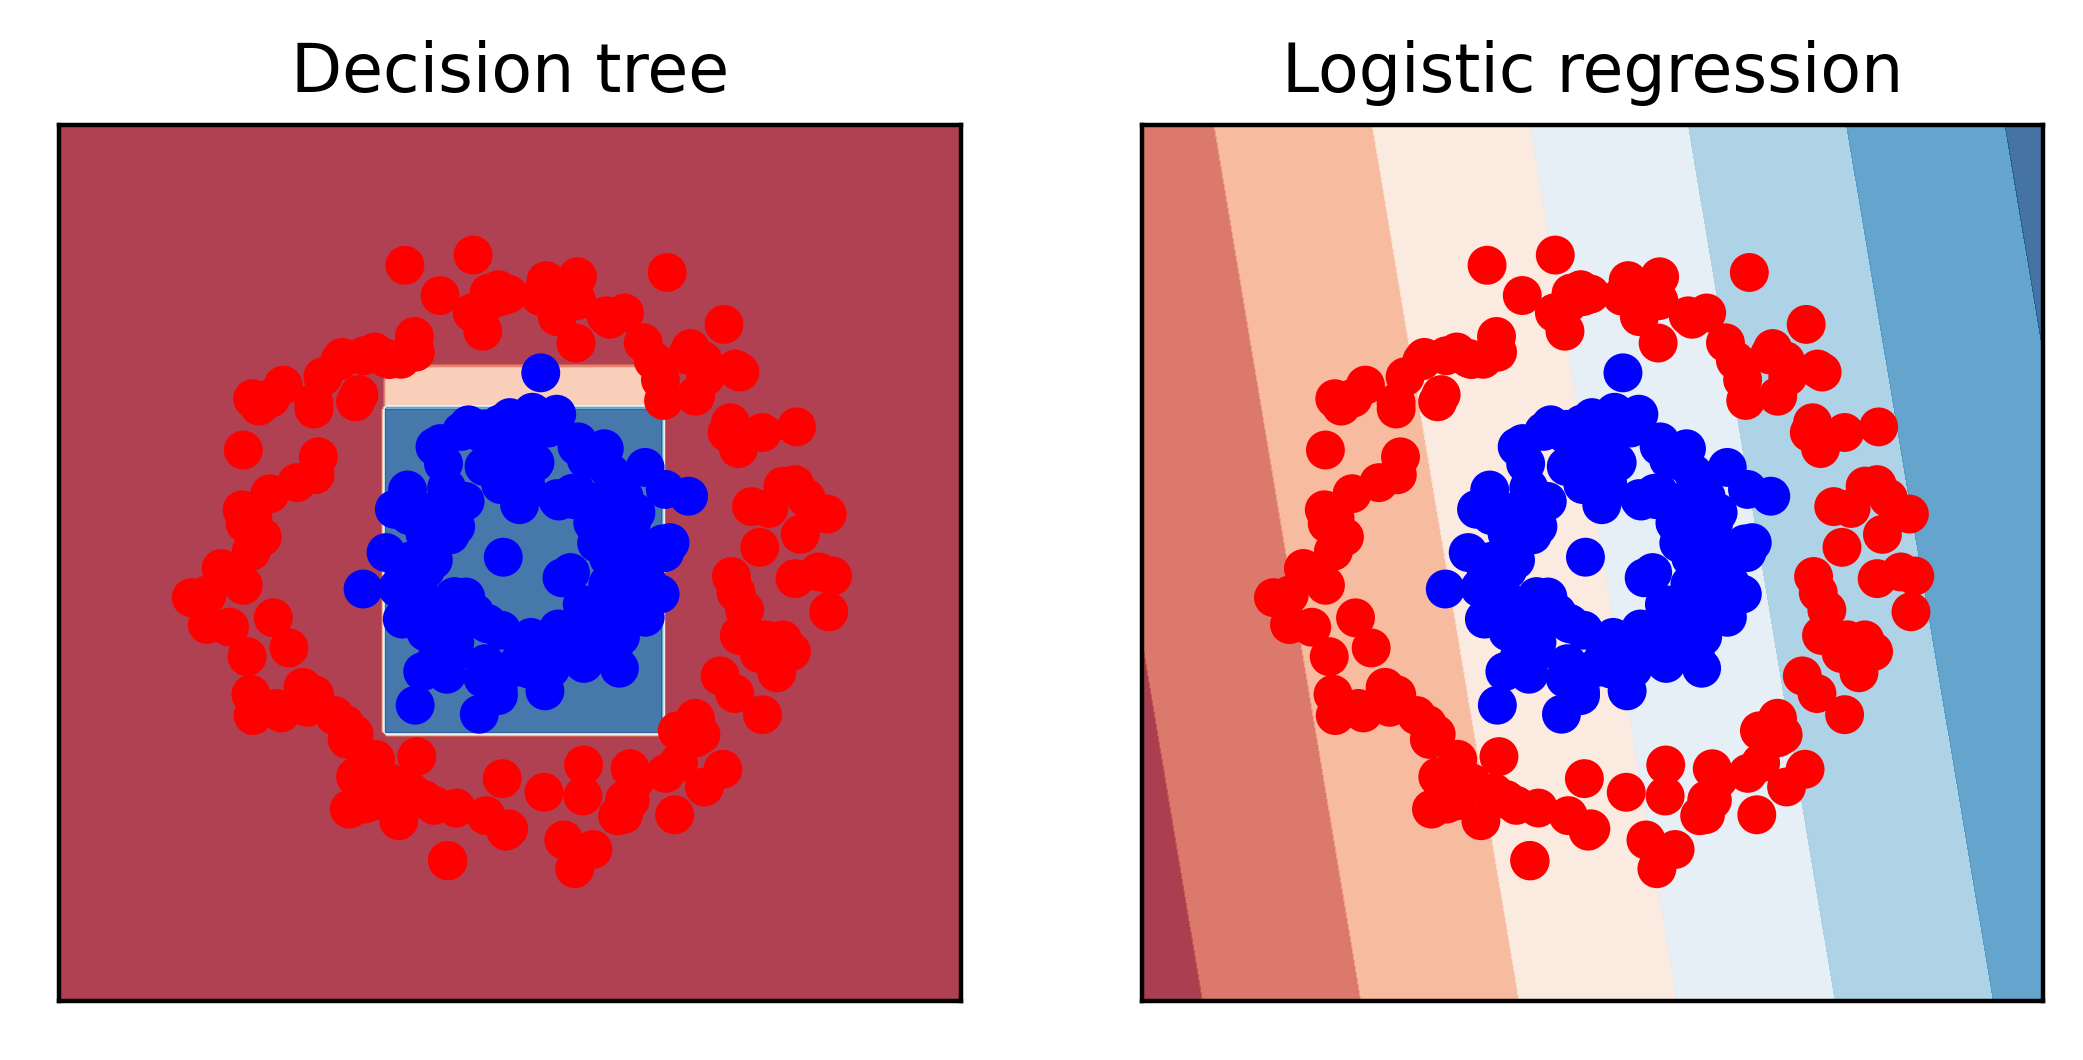

In [31]:
counter = 1
for classif in classifiers:
    ax = plt.subplot(1, 2, counter)
    classif.fit(X_circ, y_circ)
    Z = classif.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_circ[:,0], X_circ[:,1], c=y_circ, cmap=cm_bright)
    ax.set_aspect('equal')
    ax.set_title(titles[counter-1])
    ax.set_xticks([])
    ax.set_yticks([])
    counter+=1

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
X_train.shape

(21331, 17)

In [34]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} 
# 12 chosen as max depth because, with k_folds = 4 meaning 75% of 21331 being training data,
# and two splits per level, 14 ^ 2 ~~ 21331, so that's the upper limit (One sample per leaf)

# params = {'max_depth':list(range(1,13))}

In [35]:
cv = GridSearchCV(dtree, 
                  param_grid=params, # goes through the params dictionary for each cross val loop
                  scoring='roc_auc', # response operator characteristic area under the curve
                  n_jobs=None, 
                  refit=True, 
                  cv=4, # 4 fold cross validation
                  verbose=1,
                  pre_dispatch=None, 
                  error_score=np.nan, 
                  return_train_score=True # training scores are calculated
                 )


In [36]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [37]:
# could run cv.cv_results_ 
# would return a dictionary that's not easy to read
# instead, turn into pandas dataframe
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.013043,0.005061,0.007229,0.002676,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.028239,0.001882,0.002410,0.001680,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.058003,0.003322,0.003527,0.000492,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.079497,0.001596,0.002248,0.000433,6,{'max_depth': 6},0.744480,0.746479,0.751042,0.740677,0.745670,0.003737,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.103487,0.002586,0.003000,0.000708,8,{'max_depth': 8},0.728386,0.730712,0.750771,0.731606,0.735368,0.008970,3,0.811914,0.808245,0.803345,0.802413,0.806479,0.003841
5,0.122992,0.002173,0.003255,0.000430,10,{'max_depth': 10},0.709105,0.705448,0.717693,0.712092,0.711085,0.004483,4,0.848747,0.854106,0.841262,0.836053,0.845042,0.006910
6,0.133580,0.005416,0.001492,0.001492,12,{'max_depth': 12},0.674988,0.657986,0.673922,0.684226,0.672781,0.009435,6,0.890269,0.903643,0.885558,0.876044,0.888879,0.009946


In [38]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

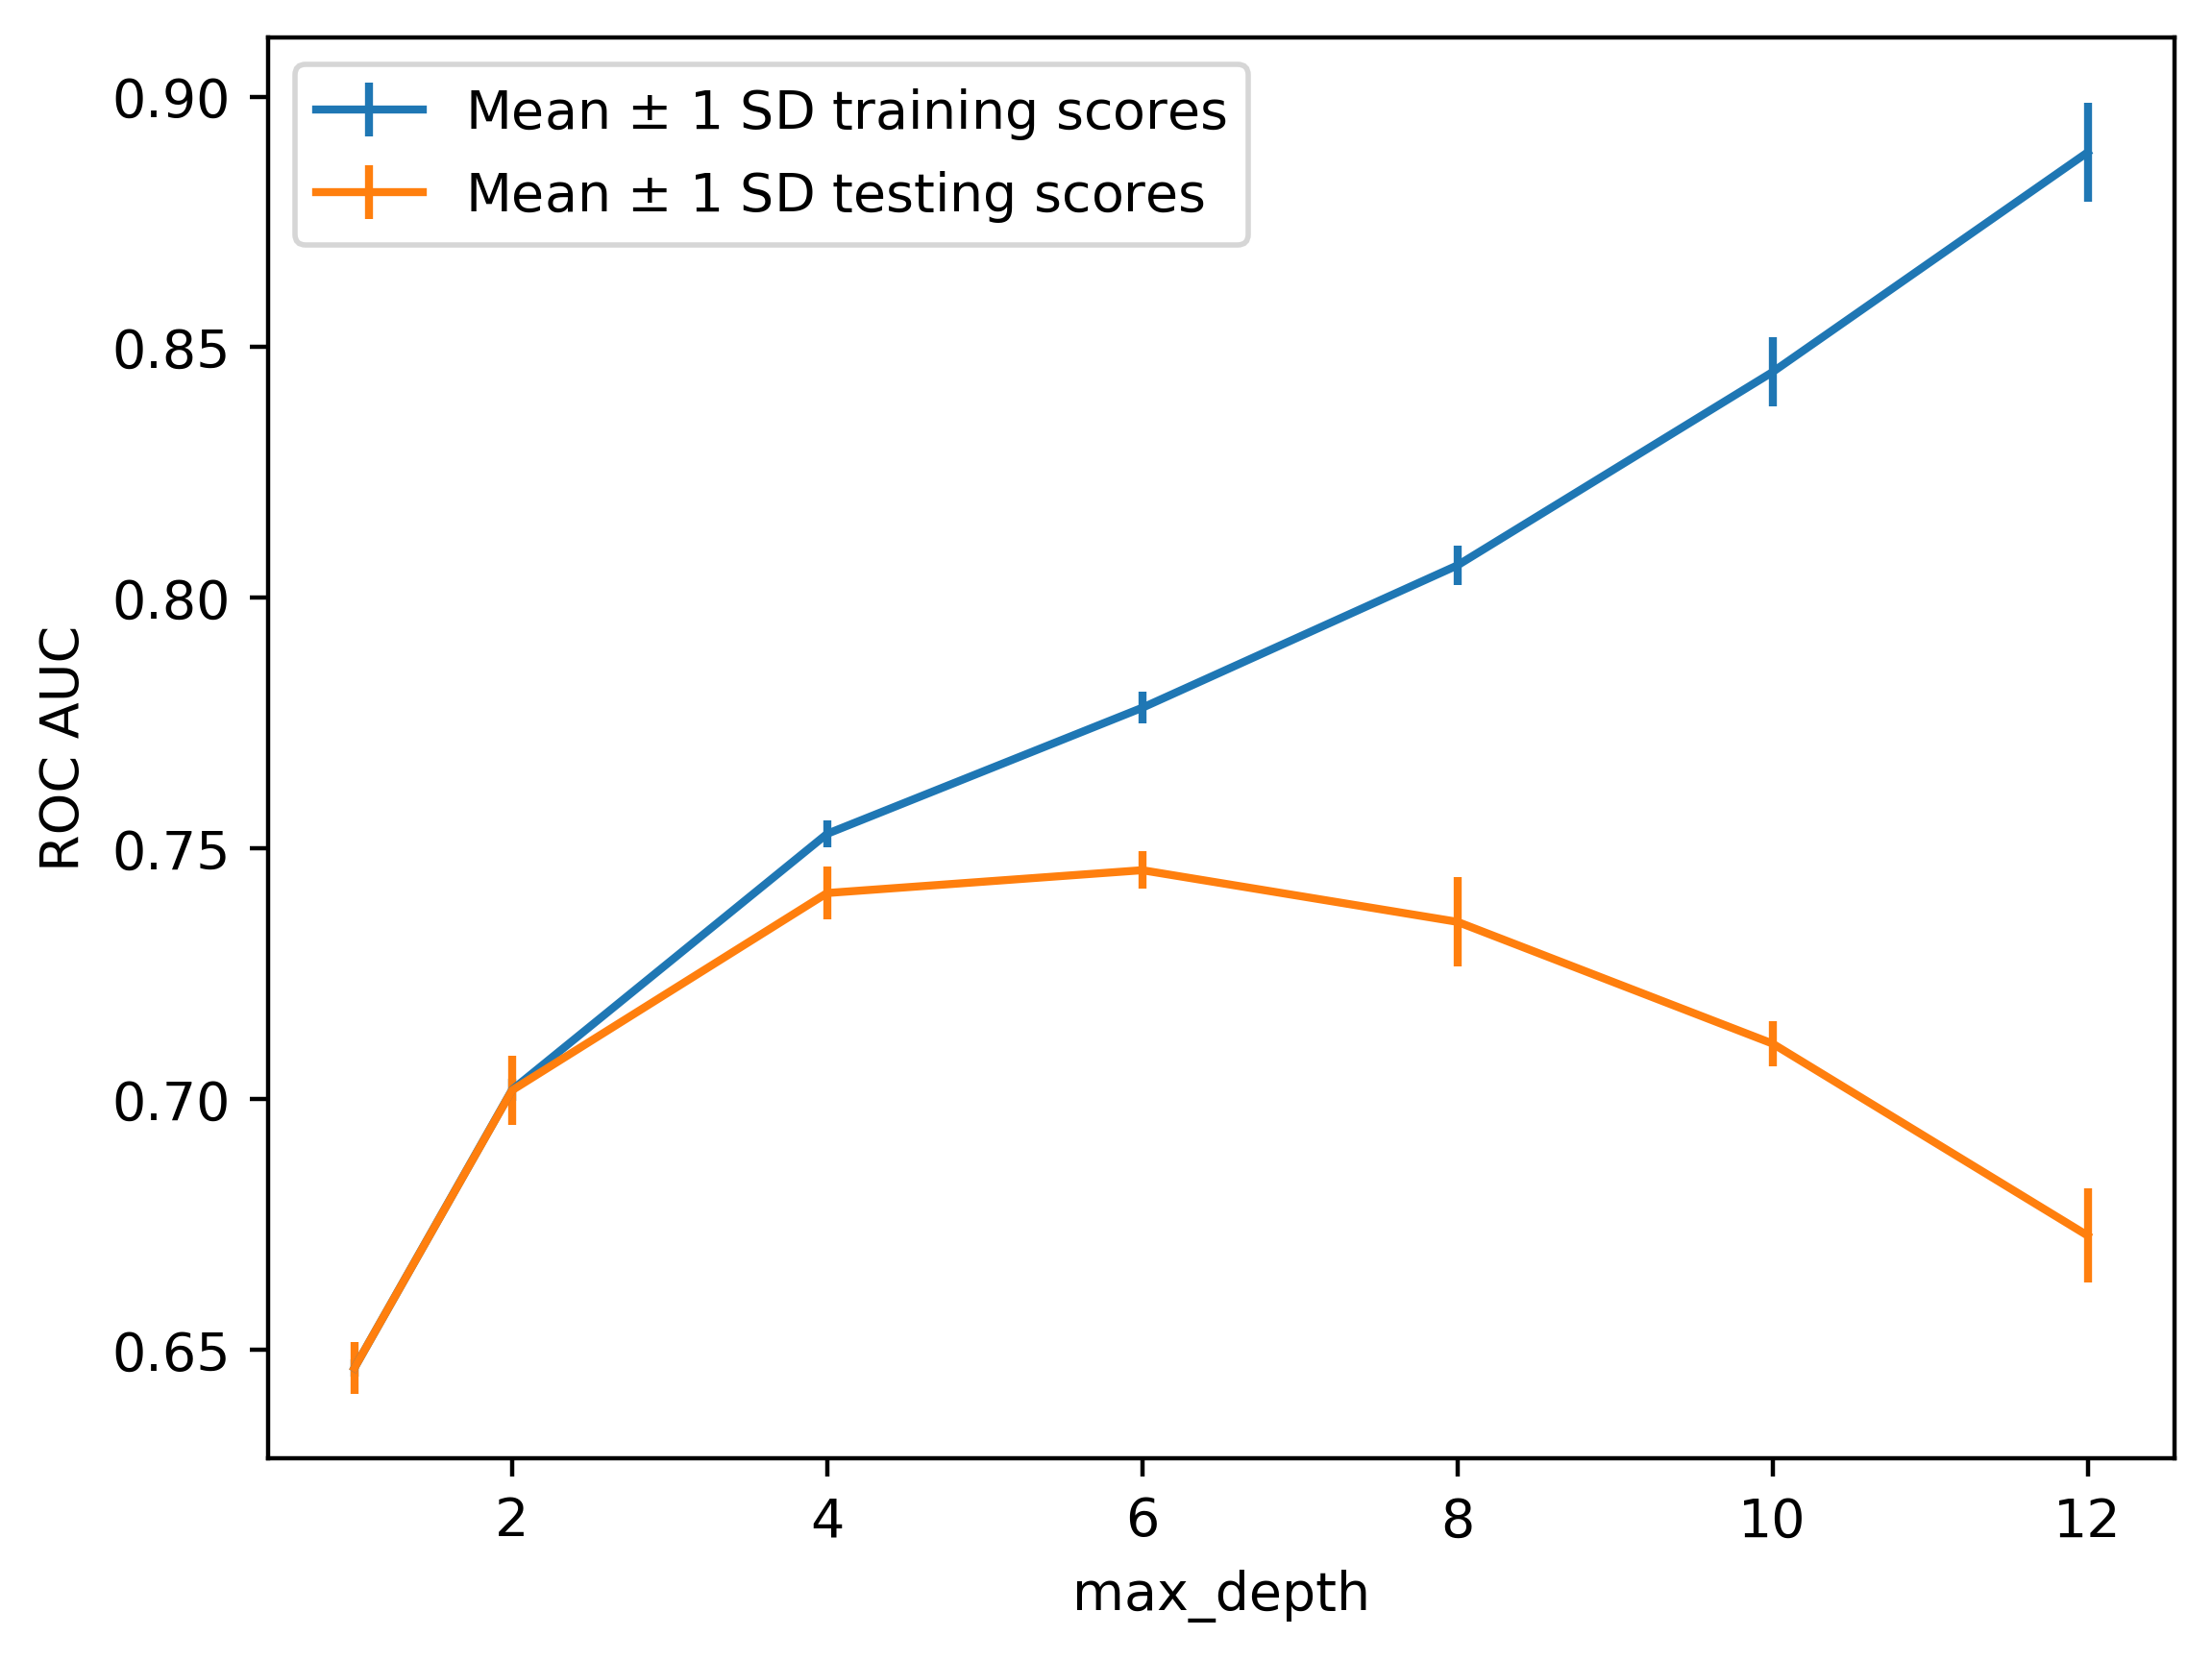

In [39]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores'
           )
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores'
           )
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

### Random Forests

Ensemble methods:

bagging - random selection of datapoints

boosting - use previously trained models errors to train successive model

stacking - use different types of models (e.g. random forest + log regression). New model uses results of the different estimators as features and is trained on them

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=10, 
                            criterion='gini',
                            max_depth=3,
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0,
                            # max_features='auto', # Is deprecated, and produces warning;
                            # 'auto' meaning sqrt is the default
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,
                            # min_impurity_split=None, #produces error
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=None,
                            random_state=4, 
                            verbose=0, 
                            warm_start=False, 
                            class_weight=None
                           )

In [42]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [43]:
cv_rf_ex = GridSearchCV(rf, 
                        param_grid=rf_params_ex, 
                        scoring='roc_auc',
                        #fit_params=None,
                        n_jobs=None, 
                        #iid=False, 
                        refit=True, 
                        cv=4,
                        verbose=1,
                        pre_dispatch=None,
                        error_score=np.nan,
                        return_train_score=True
                       )

In [44]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [45]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.087831,0.008437,0.005267,0.000424,10,{'n_estimators': 10},0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,10,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.181050,0.005045,0.007858,0.000183,20,{'n_estimators': 20},0.745612,0.753712,0.777616,0.771737,0.762169,0.012998,9,0.772819,0.771499,0.765944,0.765395,0.768914,0.003284
2,0.245272,0.023265,0.009409,0.002340,30,{'n_estimators': 30},0.747259,0.754154,0.777954,0.771825,0.762798,0.012524,7,0.774655,0.772100,0.765026,0.766697,0.769620,0.003910
3,0.332262,0.006680,0.012775,0.001634,40,{'n_estimators': 40},0.746682,0.754553,0.777709,0.773134,0.763020,0.012813,4,0.774300,0.772642,0.765051,0.765876,0.769467,0.004057
4,0.402707,0.015514,0.015502,0.000867,50,{'n_estimators': 50},0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,1,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
5,0.486026,0.035742,0.018497,0.002044,60,{'n_estimators': 60},0.748437,0.755604,0.779478,0.770978,0.763624,0.012252,2,0.775419,0.773615,0.766133,0.767032,0.770550,0.004031
6,0.581407,0.022227,0.020772,0.000790,70,{'n_estimators': 70},0.747491,0.754465,0.779104,0.771023,0.763021,0.012620,3,0.774420,0.773379,0.765960,0.766174,0.769983,0.003934
7,0.661121,0.021351,0.023646,0.001948,80,{'n_estimators': 80},0.747424,0.754488,0.778753,0.770872,0.762884,0.012502,5,0.774234,0.773257,0.765978,0.766220,0.769922,0.003840
8,0.729157,0.029377,0.025159,0.001654,90,{'n_estimators': 90},0.747097,0.753794,0.778507,0.770426,0.762456,0.012571,8,0.774095,0.772973,0.766022,0.765748,0.769709,0.003846
9,0.815281,0.028868,0.028038,0.003454,100,{'n_estimators': 100},0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,6,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750


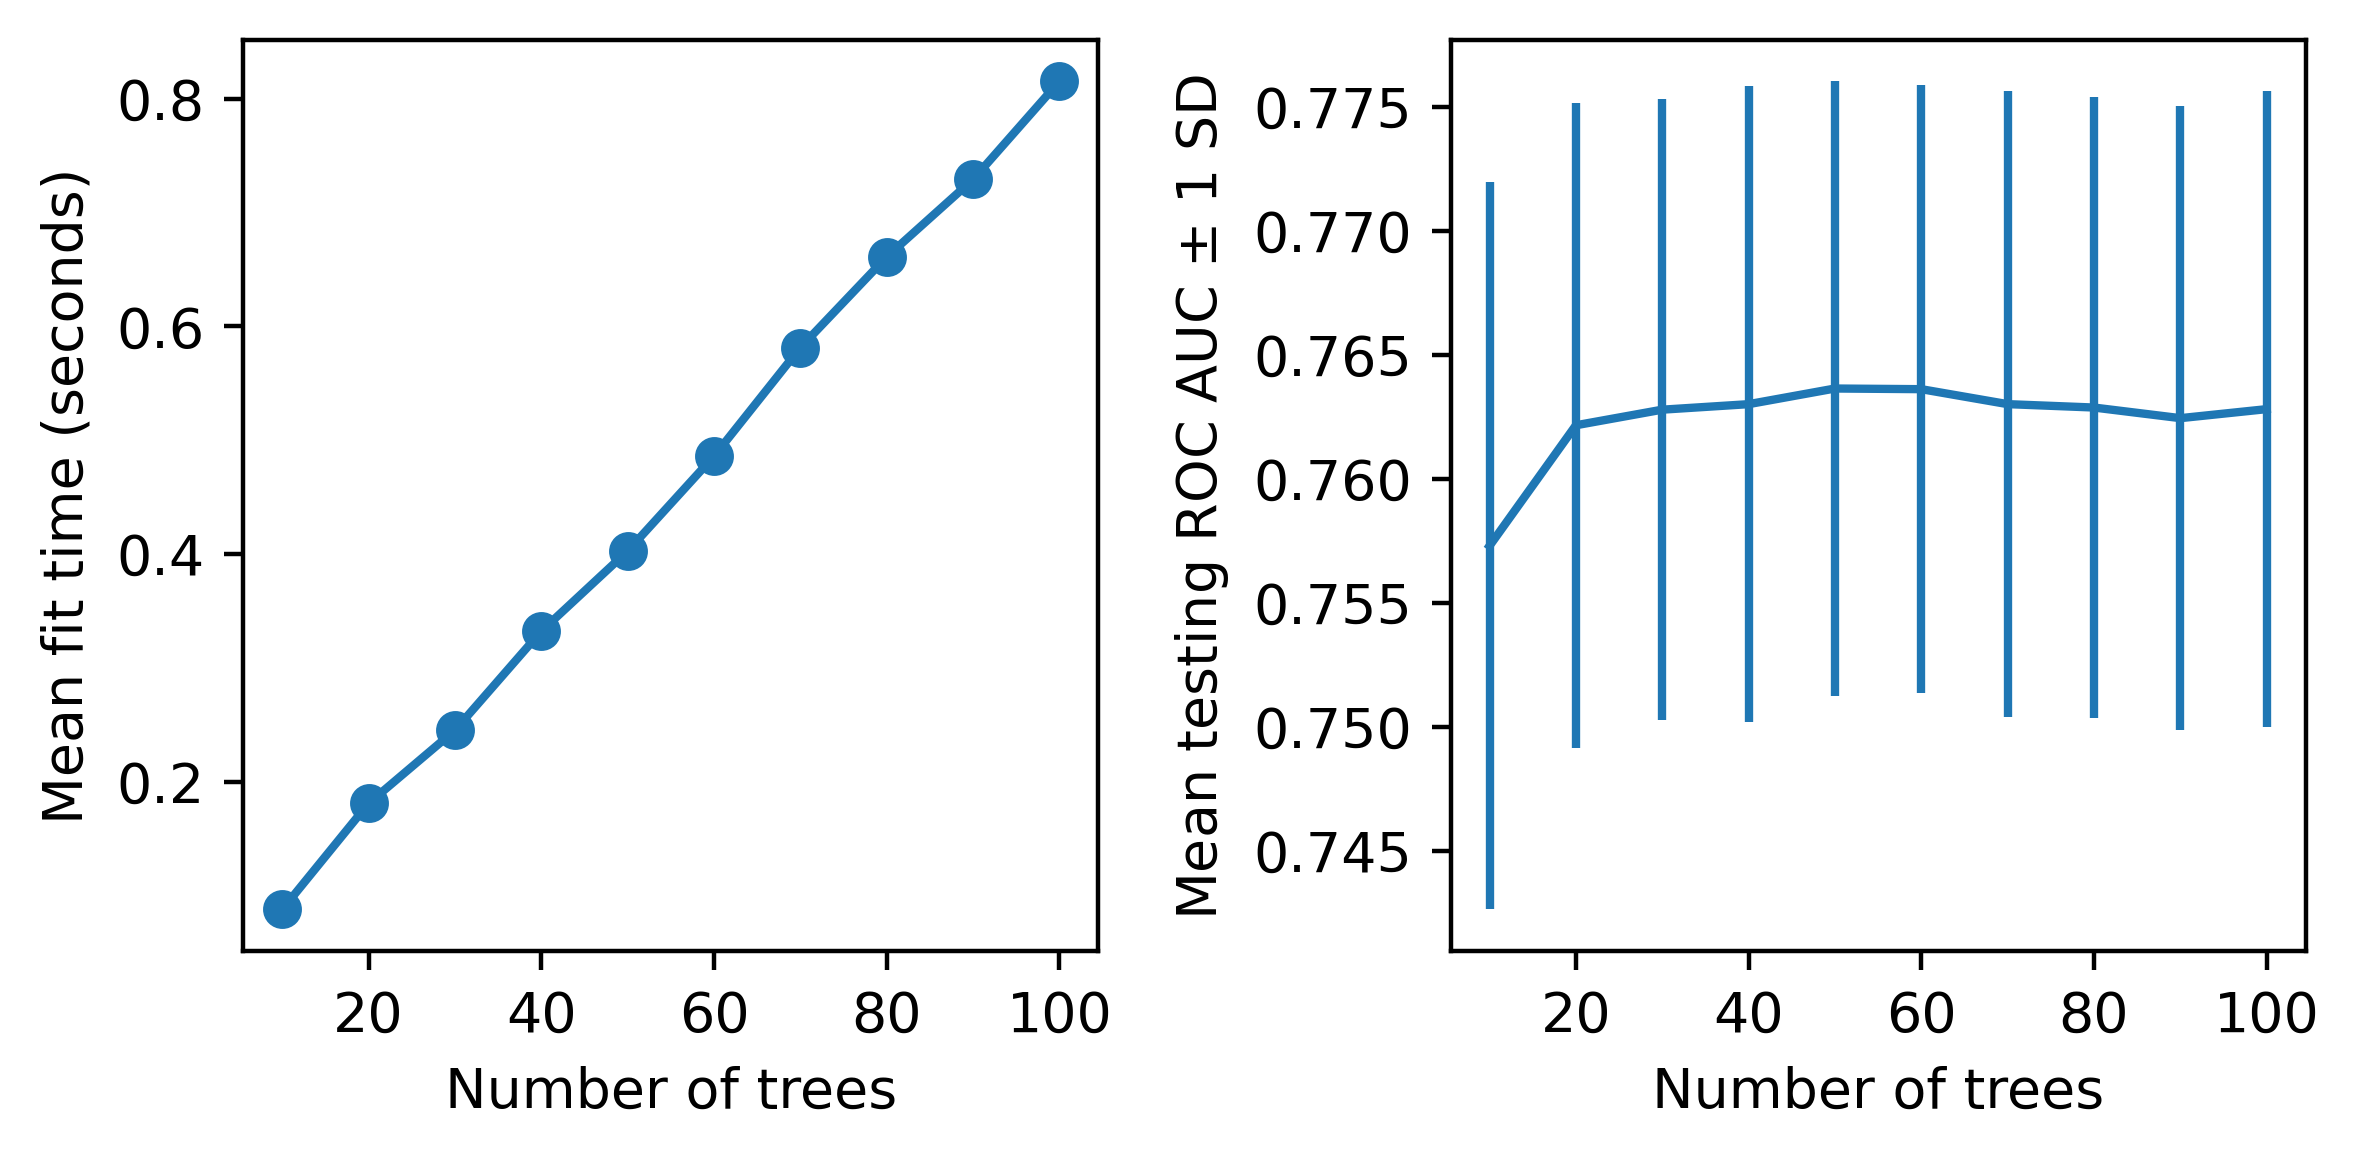

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o'
           )
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']
               )
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [47]:
cv_rf_ex.best_params_

{'n_estimators': 50}

In [48]:
feat_imp_df = pd.DataFrame({'Feature name':features_response[:-1],
                            'Importance':cv_rf_ex.best_estimator_.feature_importances_
                           })
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.609609
11,PAY_AMT1,0.094123
0,LIMIT_BAL,0.079265
13,PAY_AMT3,0.047067
12,PAY_AMT2,0.035393
6,BILL_AMT2,0.022422
14,PAY_AMT4,0.021164
15,PAY_AMT5,0.015962
10,BILL_AMT6,0.014293
8,BILL_AMT4,0.013454


In [49]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [50]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

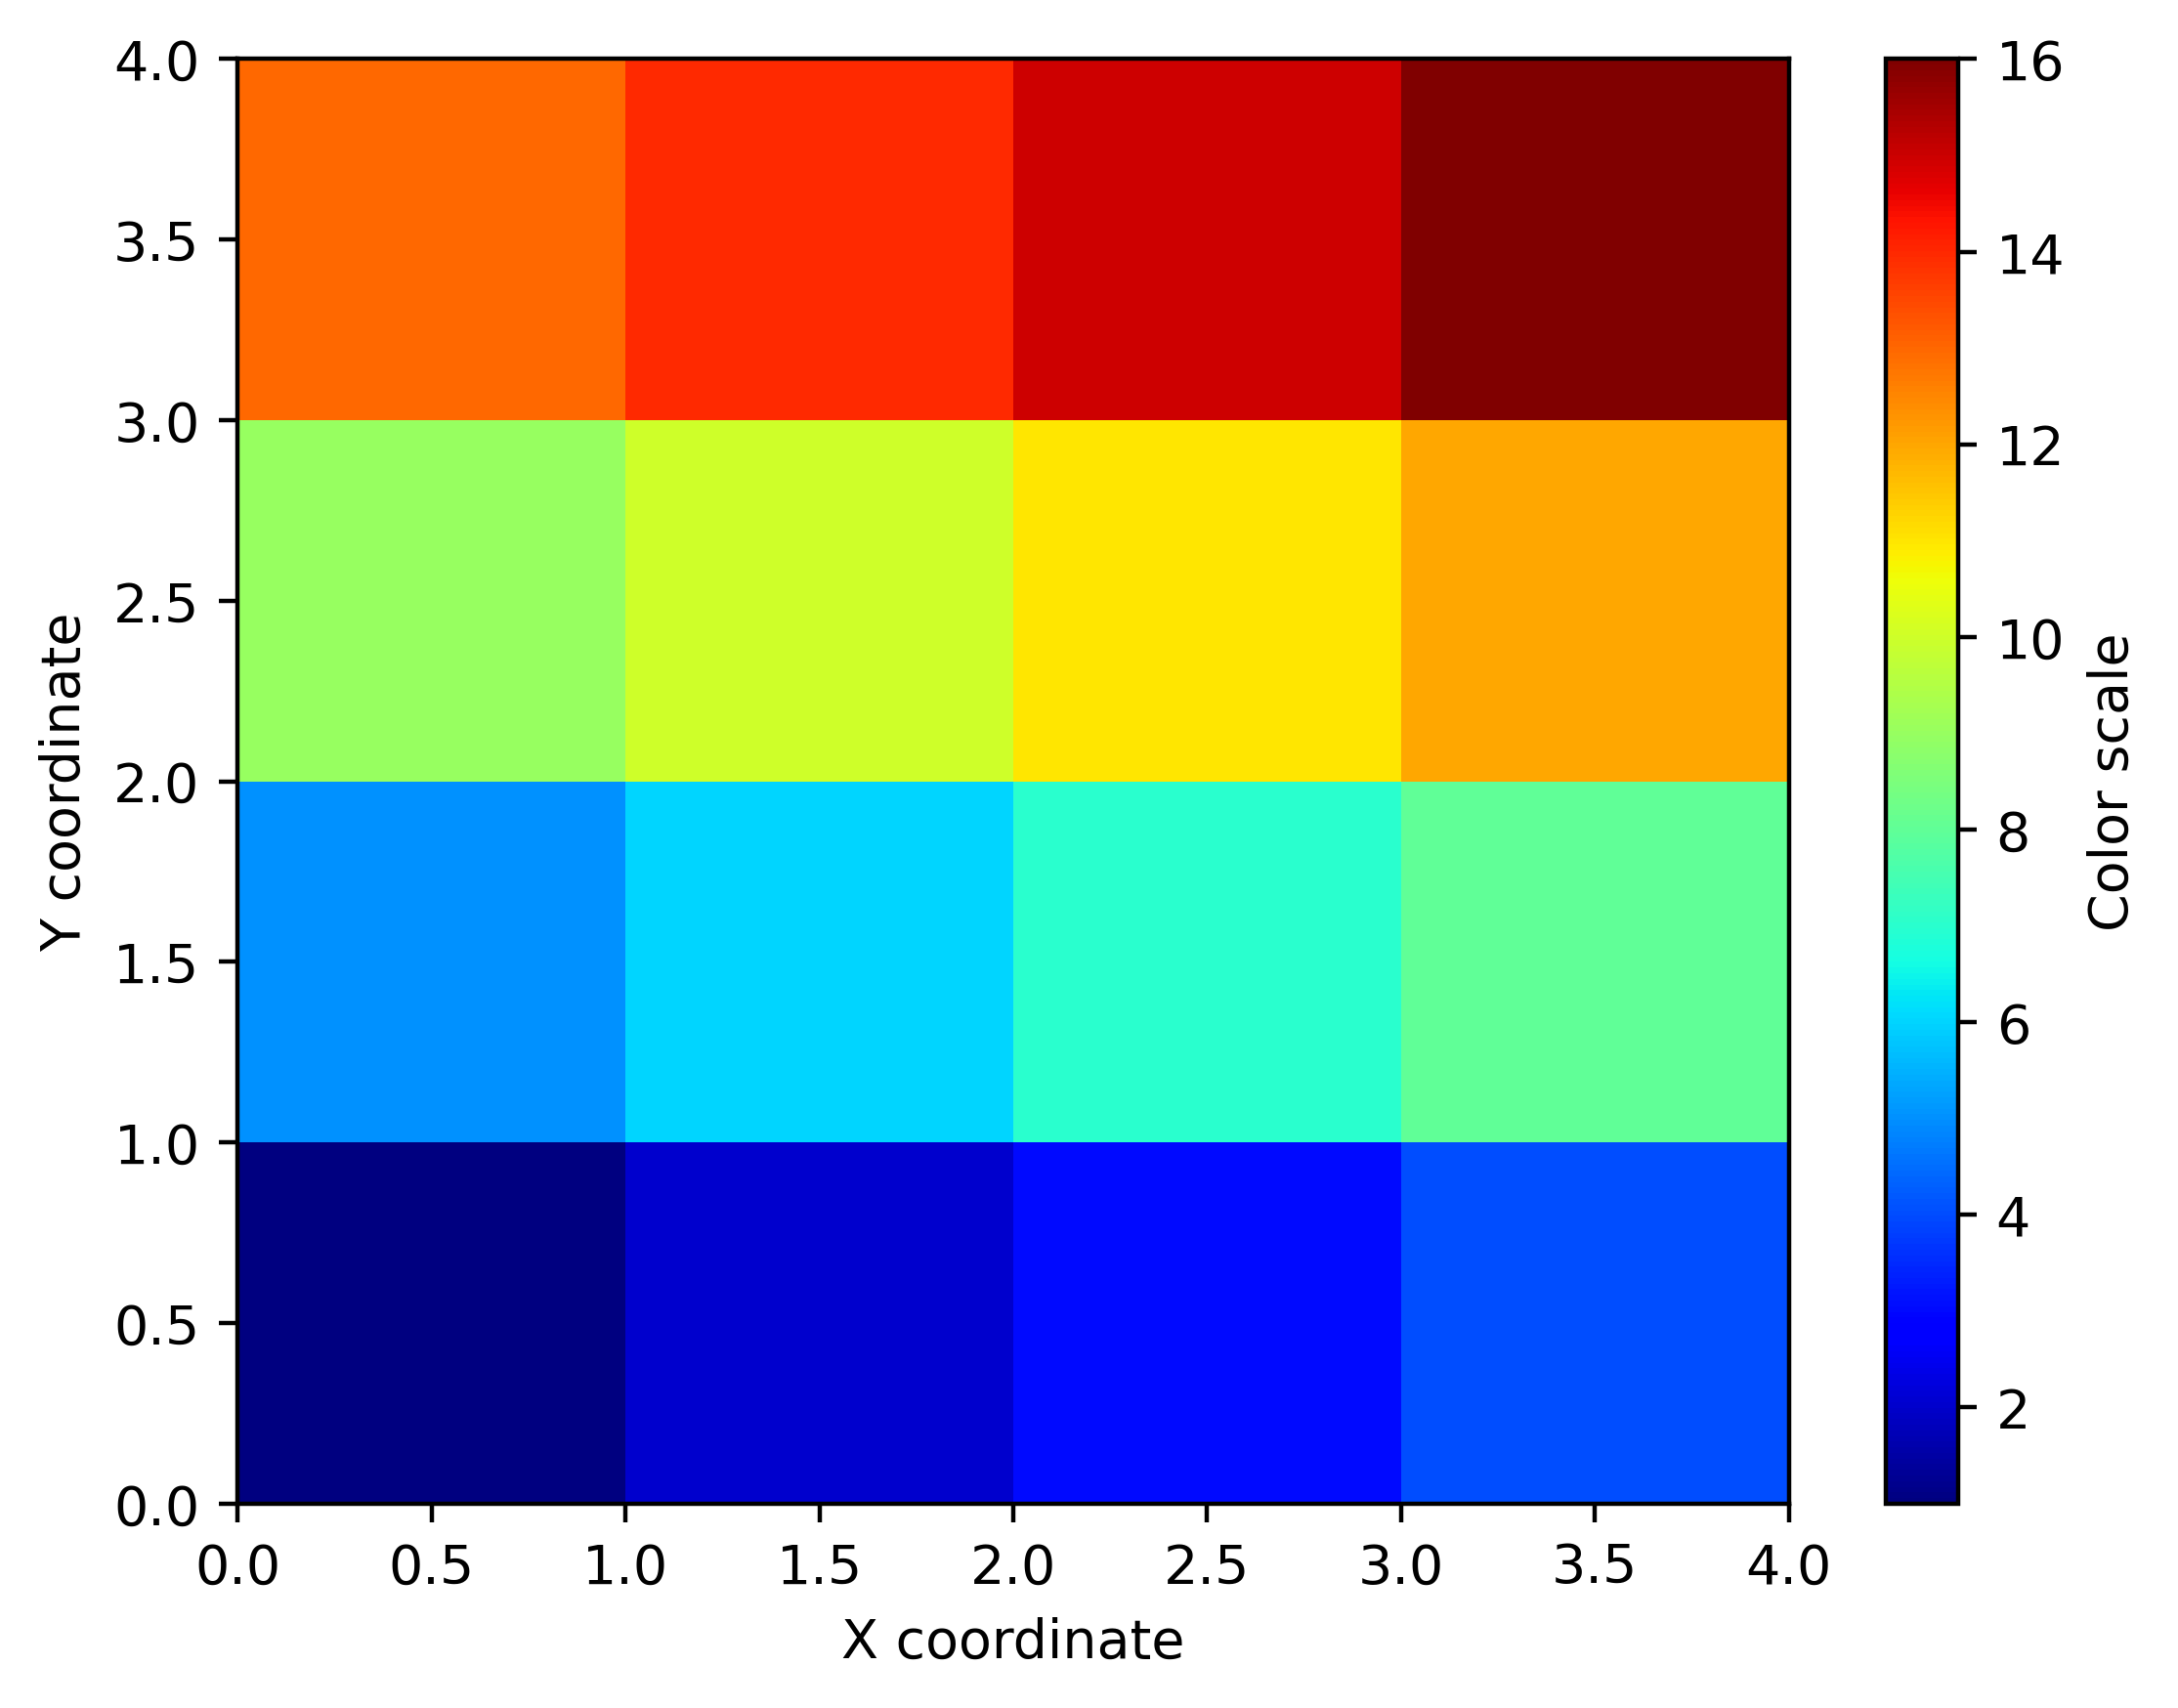

In [53]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

## Activity 5
### Cross-Validation Grid Search with Random Forest

30
['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
   LIMIT_BAL  EDUCATION  MARRIAGE  AGE  PAY_1  BILL_AMT1  BILL_AMT2  \
0      20000          2         1   24      2       3913       3102   
1     120000          2         2   26     -1       2682       1725   
2      90000          2         2   34      0      29239      14027   
3      50000          2         1   37      0      46990      48233   
4      50000          2         1   57     -1       8617       5670   

   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0        689          0          0          0         0       689         0   
1       2682       3272       3455       3261         0      1000      1000   
2      13559      14331      14948      15549      1518      1500      1000   
3      49291      2

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123


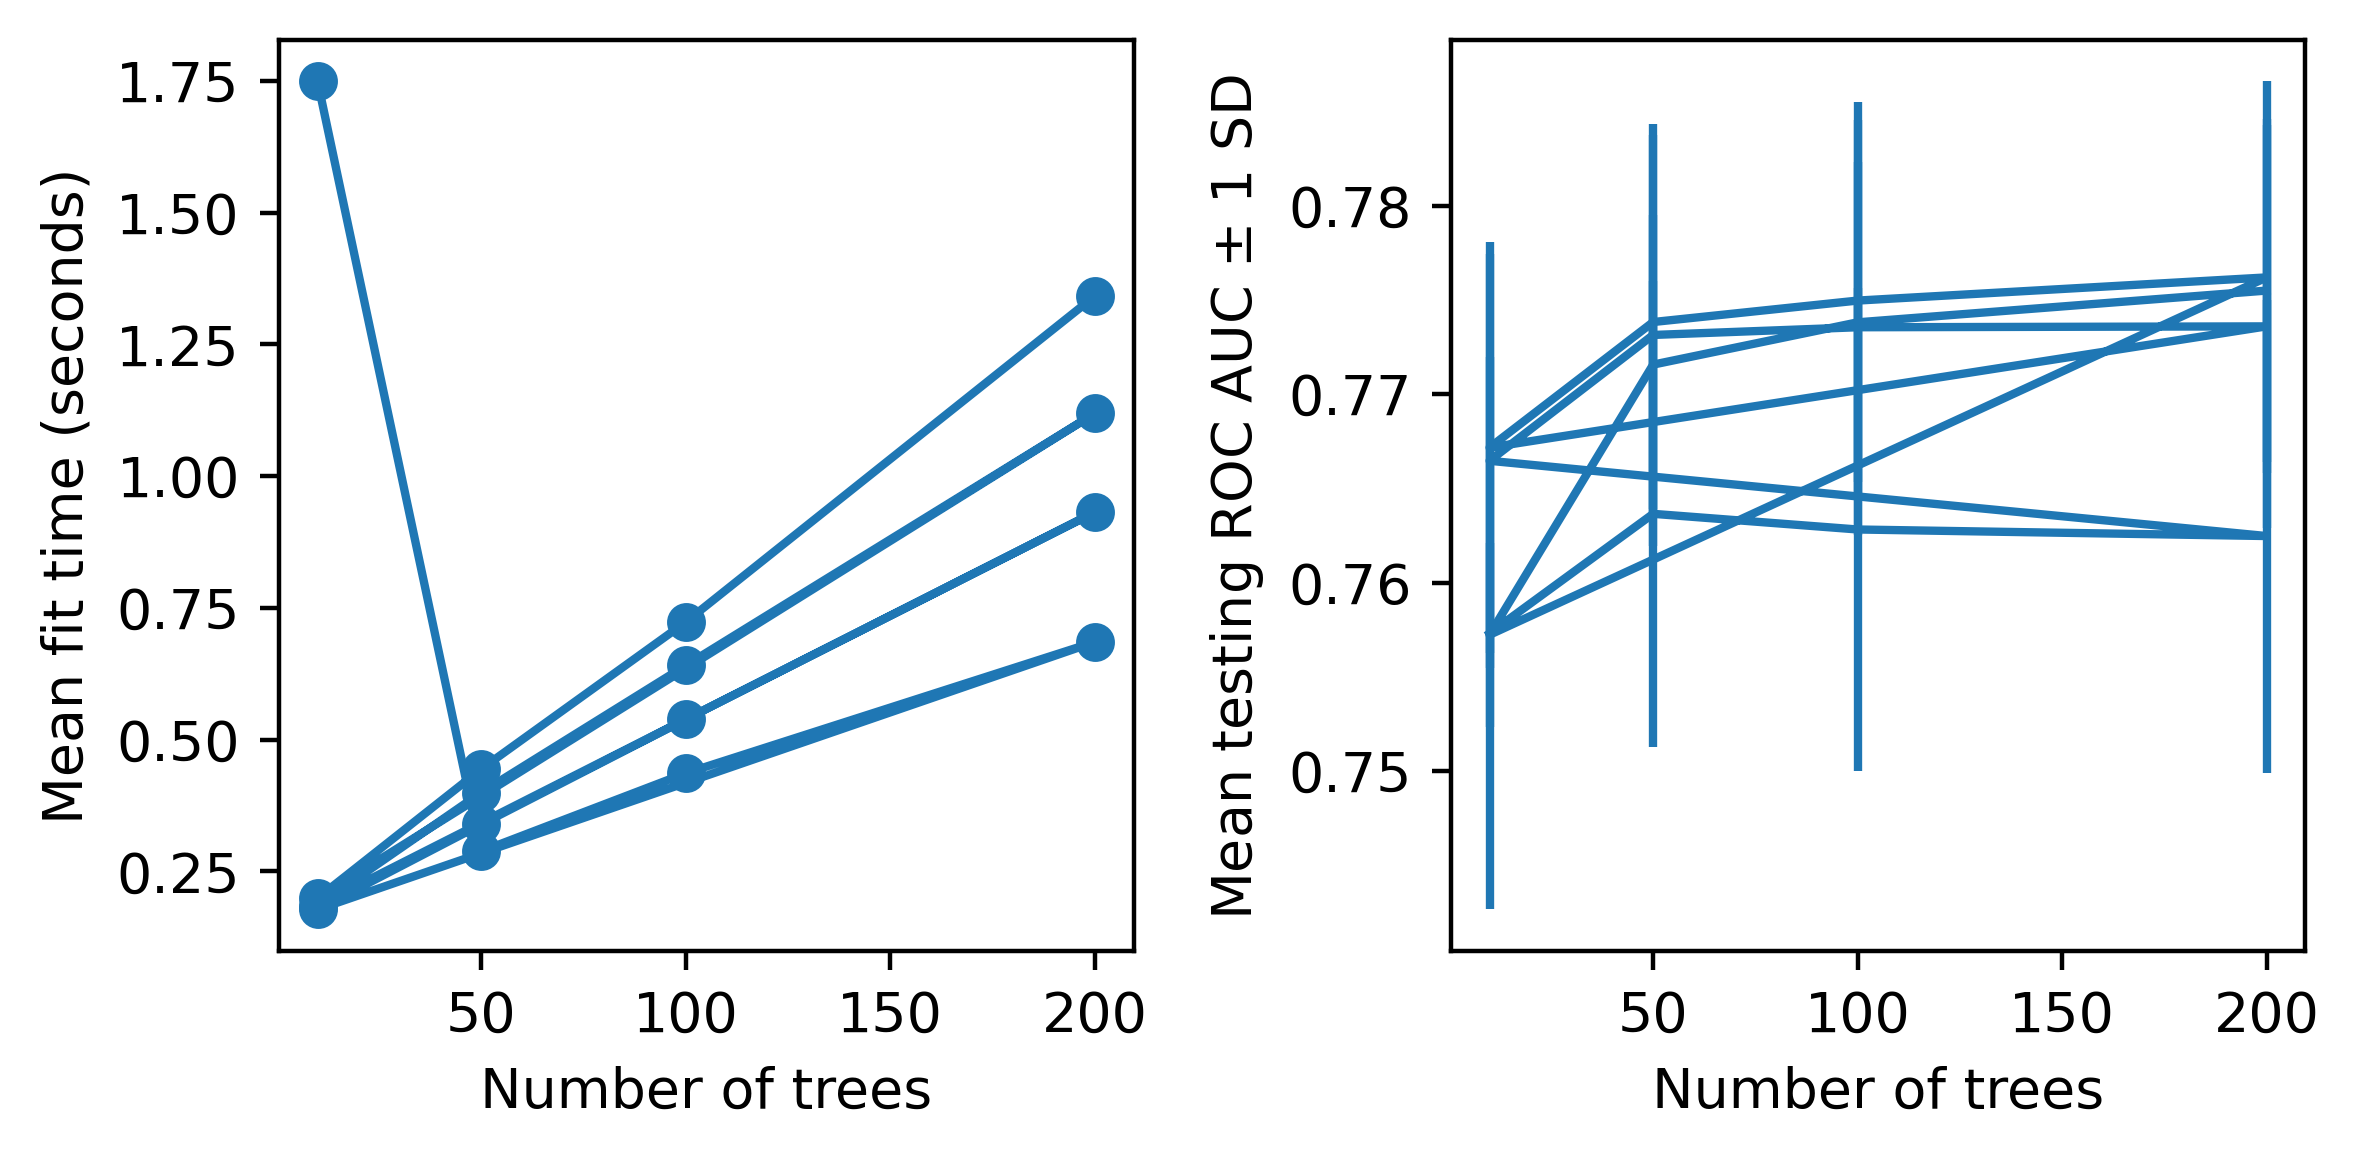

In [77]:
#### importing packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### importing data
df = pd.read_csv('C:/Users/Box/Documents/Ebooks/Data Science/\
Projects and Data/Data Science Project/Chapter_1_cleaned_data.csv')

# Checking data

features_response = df.columns.tolist()
print(len(features_response))


# remove features


items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school',
                   'none', 'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
print(features_response)
df = df[features_response]
print(df.head())

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, 
                                                    df['default payment next month'].values, 
                                                    test_size=0.2, random_state=24)

# setting up the random forest classifier

rf = RandomForestClassifier(n_estimators=10, 
                            criterion='gini',
                            max_depth=3,
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0,
                            # max_features='auto', # Is deprecated, and produces warning;
                                                   # 'auto' meaning 'sqrt' is the default
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0,
                            # min_impurity_split=None, #produces error
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=-1,  ##### Saves A LOT of time, runs multiple jobs in parallel
                                        ##### -1 means as many as possible
                            random_state=4, 
                            verbose=0, 
                            warm_start=False, 
                            class_weight=None
                           )


# setting up the GridSearchCV

params = {'max_depth':[3, 6, 9, 12, ], 'n_estimators':[10, 50, 100, 200]}


#### unused
#cv = GridSearchCV(dtree, 
#                  param_grid=params, # goes through the params dictionary for each cross val loop
#                  scoring='roc_auc', # response operator characteristic area under the curve
#                  n_jobs=None, 
#                  refit=True, 
#                  cv=4, # 4 fold cross validation
#                  verbose=2, # prints output at each iteration
#                  pre_dispatch=None, 
#                  error_score=np.nan, 
#                  return_train_score=True # training scores are calculated
#                 )


cv = GridSearchCV(  rf, 
                    param_grid=params, # goes through the params dictionary for each cross val loop
                    scoring='roc_auc', # response operator characteristic area under the curve
                    #fit_params=None,
                    n_jobs=None, 
                    #iid=False, 
                    refit=True, 
                    cv=4, # cross validation with 4 folds
                    verbose=2, # prints output at each iteration; verbose=1 outputs at beginning only
                    pre_dispatch=None,
                    error_score=np.nan,
                    return_train_score=True
                    )


#### Train Model
cv.fit(X_train, y_train)
cv_results_df = pd.DataFrame(cv.cv_results_)
print(cv_results_df)

#### plot model results

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_results_df['param_n_estimators'],
            cv_results_df['mean_fit_time'],
            '-o'
           )
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_results_df['param_n_estimators'],
                cv_results_df['mean_test_score'],
                yerr=cv_results_df['std_test_score']
               )
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

#### get best parameters

print(cv.best_params_)

#### feature importance

feat_imp_df = pd.DataFrame({'Feature name':features_response[:-1],
                            'Importance':cv.best_estimator_.feature_importances_
                           })
(feat_imp_df.sort_values('Importance', ascending=False))



In [64]:
cv_results_df['param_n_estimators'].values.reshape(4, 4)

array([[10, 50, 100, 200],
       [10, 50, 100, 200],
       [10, 50, 100, 200],
       [10, 50, 100, 200]], dtype=object)

In [65]:
cv_results_df['param_max_depth'].values.reshape(4, 4)

array([[3, 3, 3, 3],
       [6, 6, 6, 6],
       [9, 9, 9, 9],
       [12, 12, 12, 12]], dtype=object)

In [66]:
cv_results_df['mean_test_score'].values.reshape(4, 4)

array([[0.75730766, 0.76365051, 0.76281941, 0.76247114],
       [0.7664656 , 0.77314378, 0.77355231, 0.77359992],
       [0.76716589, 0.77383029, 0.77496884, 0.77619851],
       [0.75722825, 0.77157003, 0.77381473, 0.77549938]])

In [68]:
np.array(cv_results_df['param_n_estimators'].values.reshape(4, 4),
                                         dtype='float64')

array([[ 10.,  50., 100., 200.],
       [ 10.,  50., 100., 200.],
       [ 10.,  50., 100., 200.],
       [ 10.,  50., 100., 200.]])

Text(188.26388888888886, 0.5, 'max Depth')

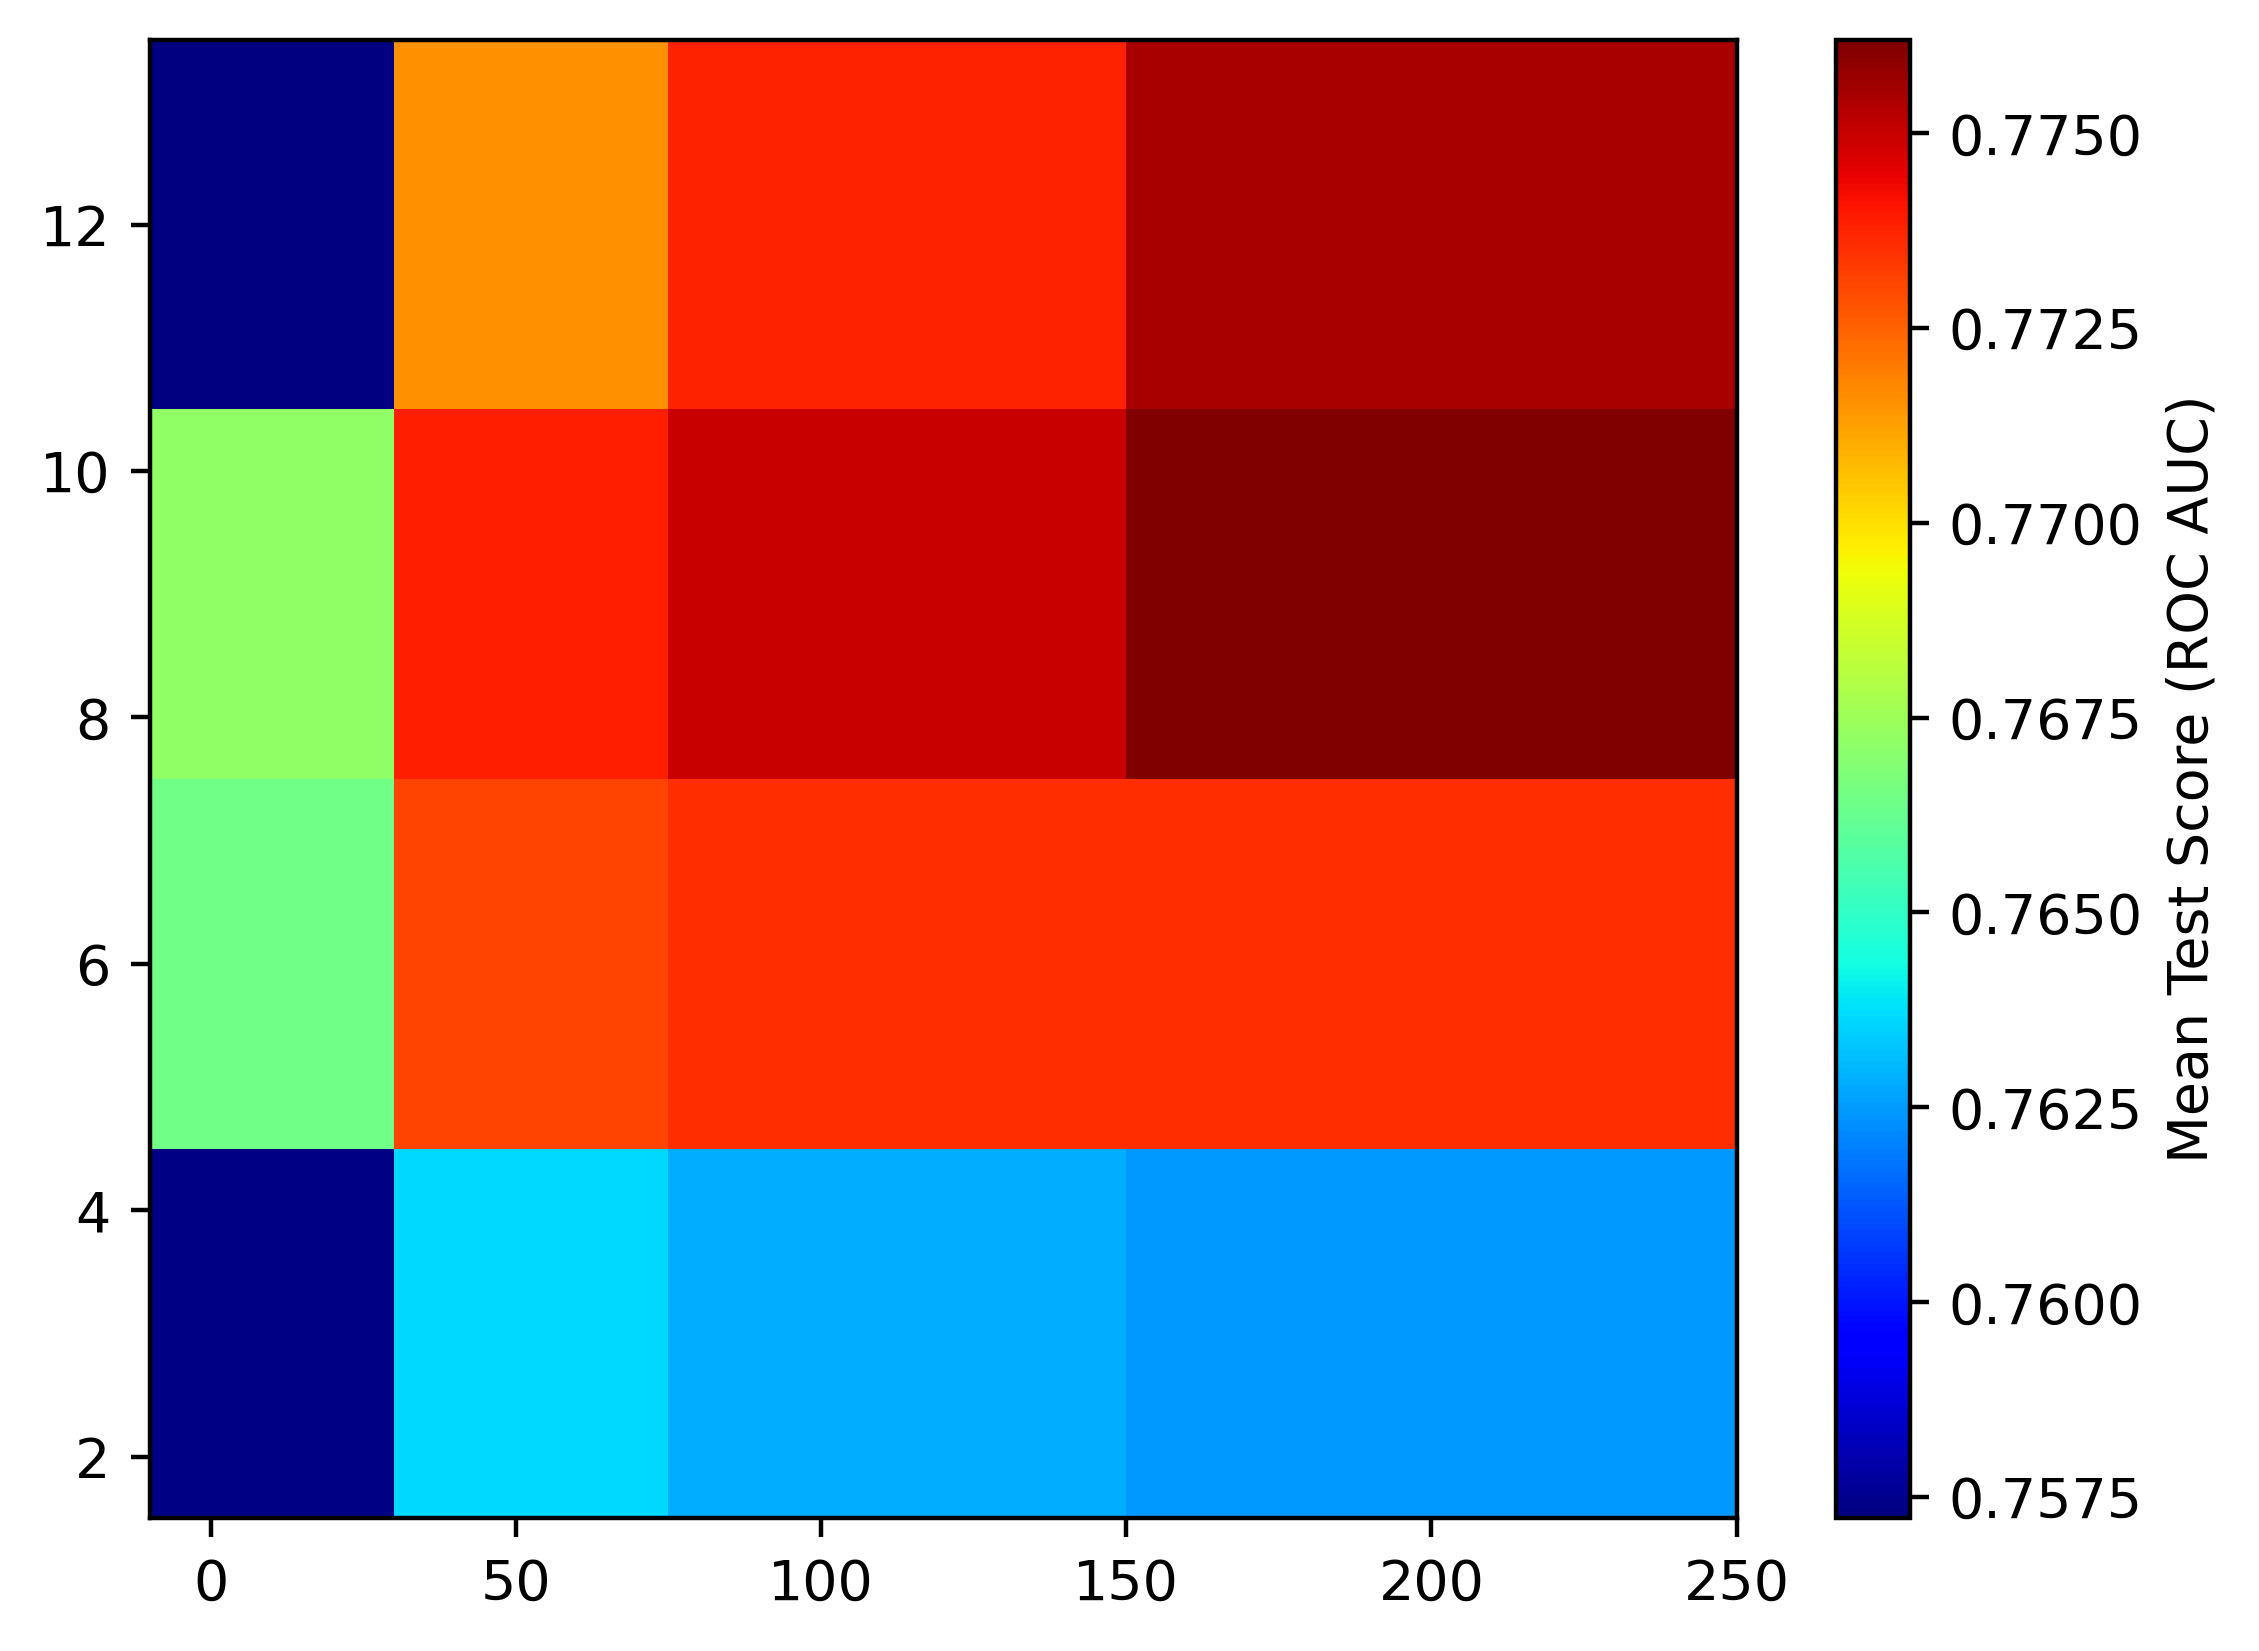

In [72]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(np.array(cv_results_df['param_n_estimators'].values.reshape(4, 4),
                                         dtype='float64'),
                                np.array(cv_results_df['param_max_depth'].values.reshape(4, 4),
                                         dtype='float64'),
                                np.array(cv_results_df['mean_test_score'].values.reshape(4, 4),
                                         dtype='float64'),
                                cmap=plt.cm.jet
                            )
ax_rf.set_aspect('auto')
plt.colorbar(pcolor_graph, label='Mean Test Score (ROC AUC)')
ax.set_xlabel('n Estimators')
ax.set_ylabel('max Depth')

Text(0, 0.5, 'Maximum depth')

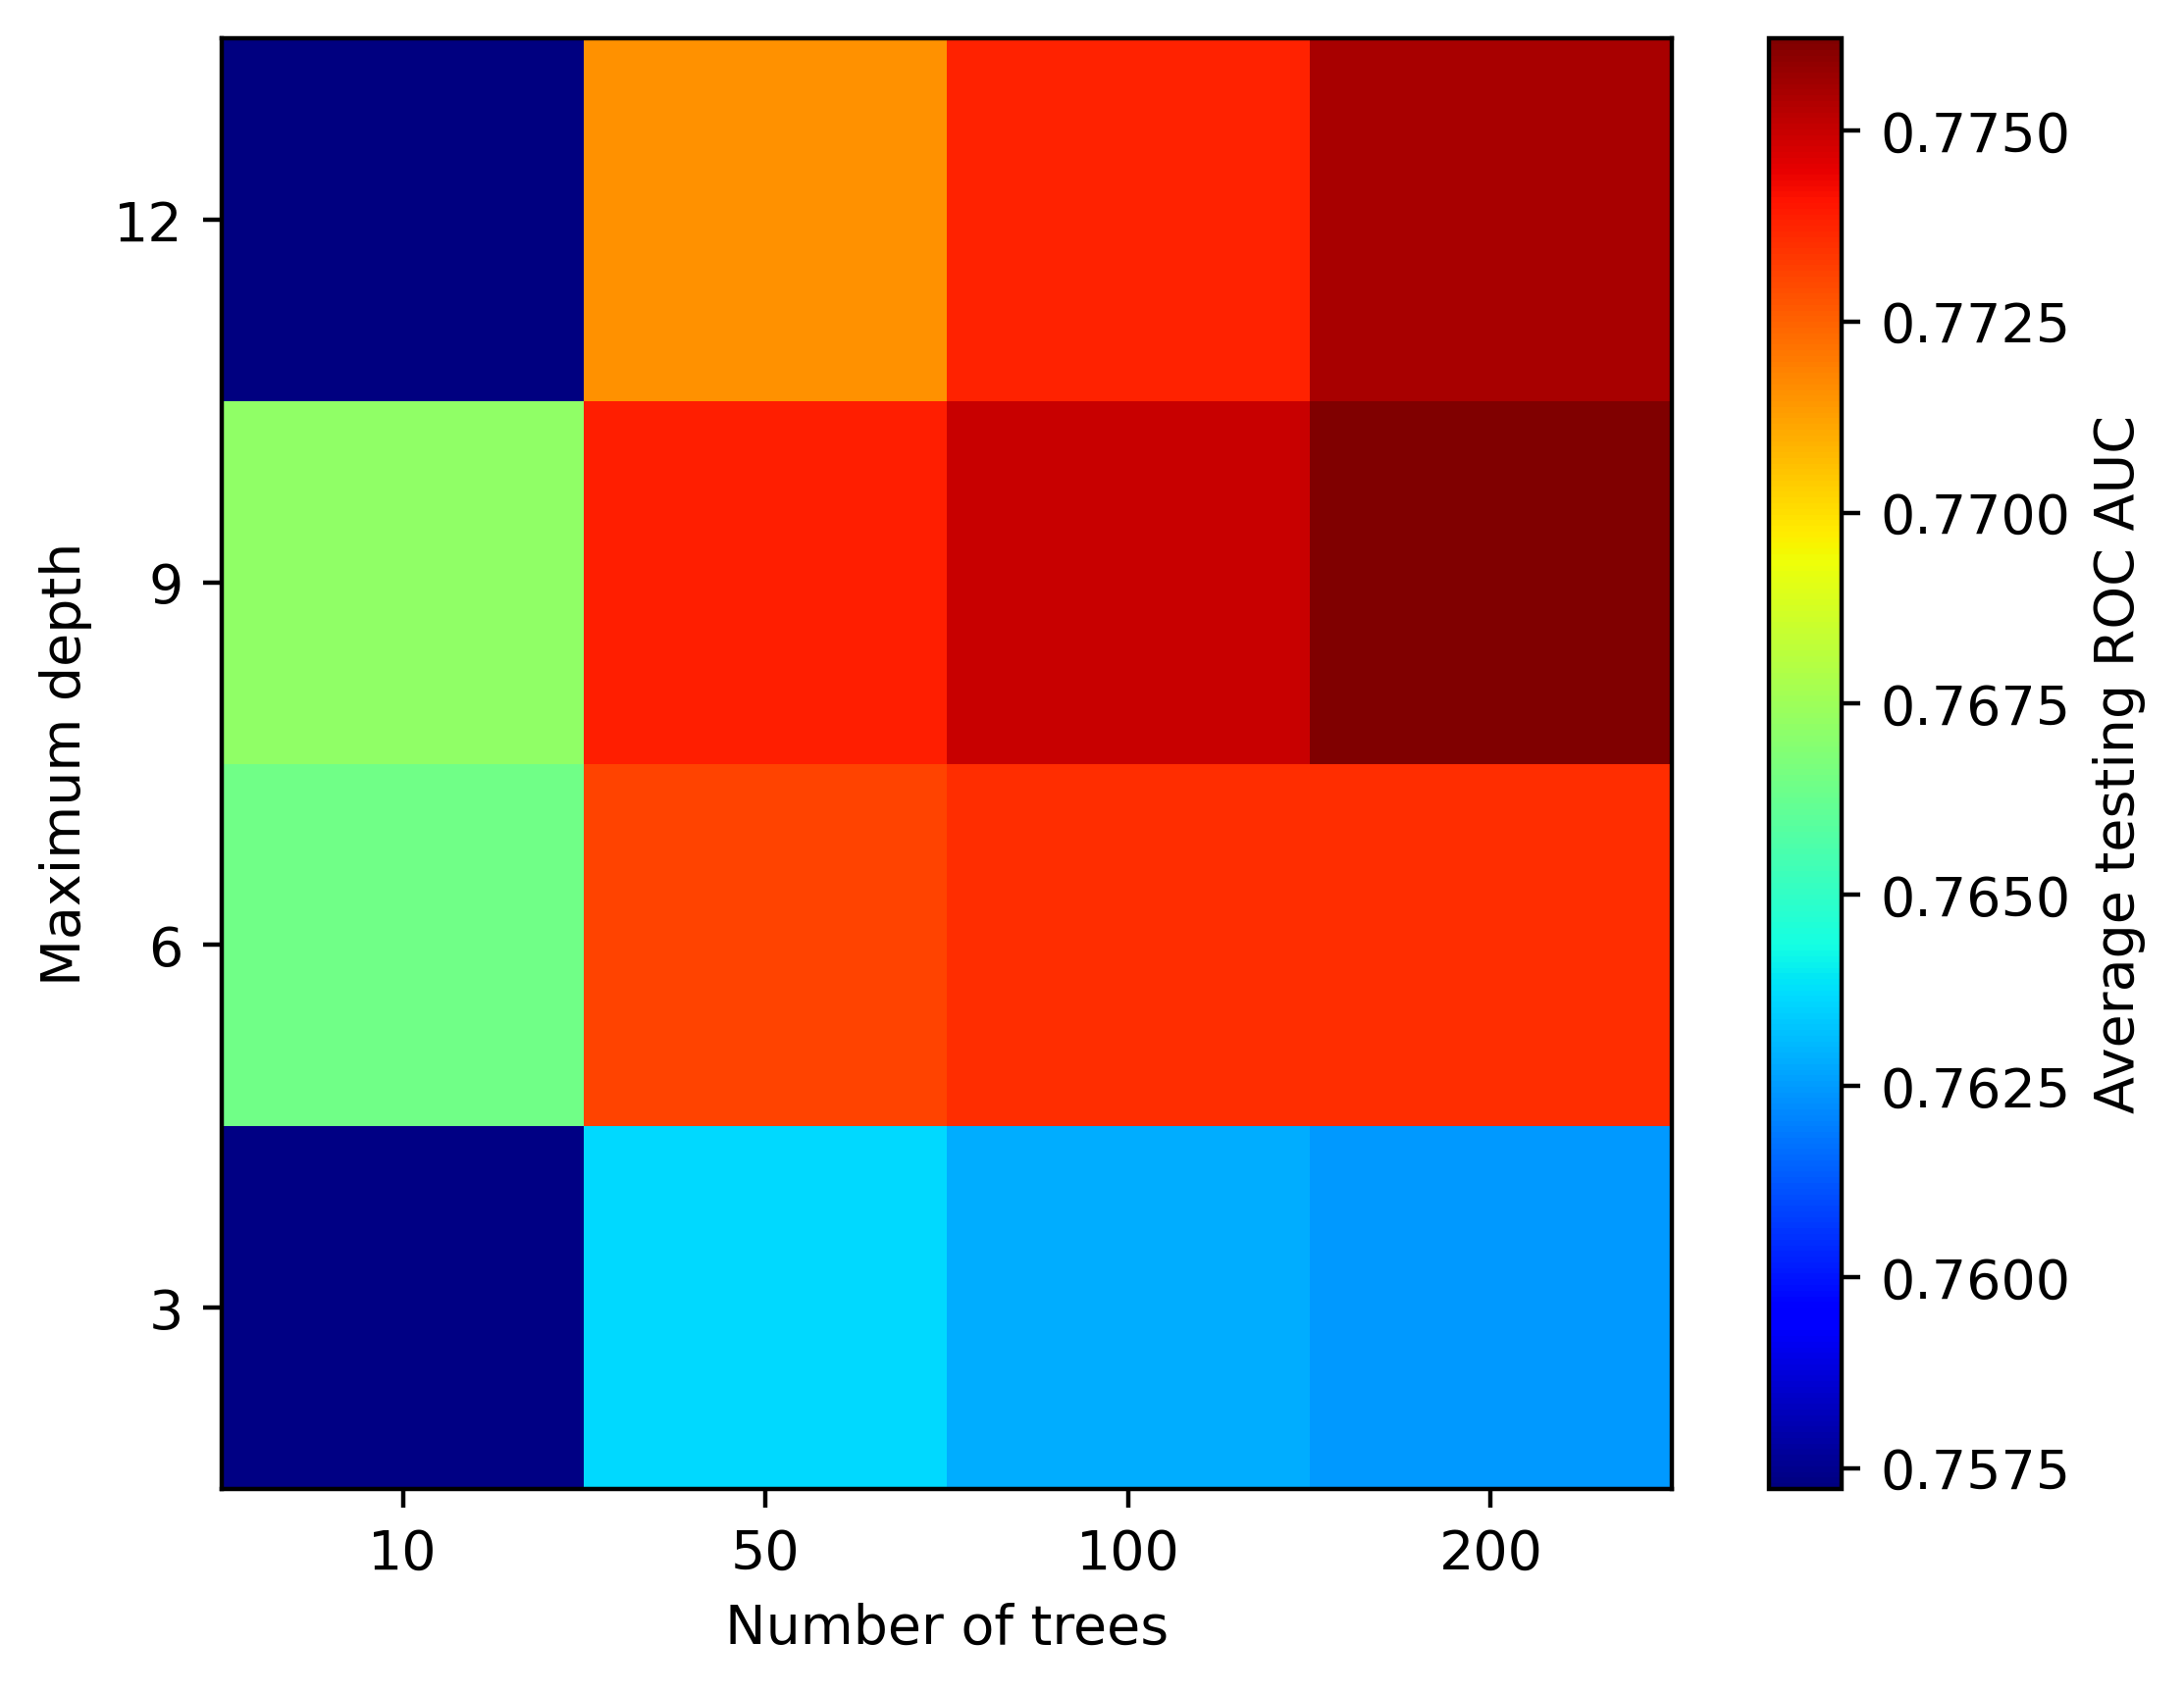

In [76]:
# solution uses the following (nicer aspect ratio)
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')